# Set up

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
drive_path = 'drive/MyDrive'

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Dataset

Dataset source: https://www.kaggle.com/datasets/muthuj7/weather-dataset

In [3]:
#drive_path = '__datasets'
df = pd.read_csv(f'{drive_path}/weatherHistory.csv')
df

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[96453 rows x 12 columns]

## Dataset lookup

In [6]:
def dataset_lookup(df):
    print('Dataset info:')
    print(df.info())
    print()
    print('Dataset description:')
    print(df.describe())
    print()
    print('Amount of duplicates:')
    duplicates_amount = df.duplicated().sum()
    print(duplicates_amount)
    if (duplicates_amount > 0):
        print('Duplicates:')
        print(df[df.duplicated(keep = False)])
    print()
    print('Amount of missing values:')
    print(df.isna().sum(axis = 0))
    print()
    print('Unique values in each column:')
    object_types_count = 0
    for column in df:
        if df[column].dtypes == 'object':
            object_types_count += 1
            print('-' * len(column))
            print(f'{column}: {df[column].unique()}')
    if object_types_count == 0:
        print('-' * 10)
        print('No object columns in this dataset.')

dataset_lookup(df)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None

Dataset description:
       Temperature (C)  Appa

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Unique values in each column:
--------------
Formatted Date: ['2006-04-01 00:00:00.000 +0200' '2006-04-01 01:00:00.000 +0200'
 '2006-04-01 02:00:00.000 +0200' ... '2016-09-09 21:00:00.000 +0200'
 '2016-09-09 22:00:00.000 +0200' '2016-09-09 23:00:00.000 +0200']
-------
Summary: ['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mos

In [9]:
df.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

# Visual analysis

## Missing values

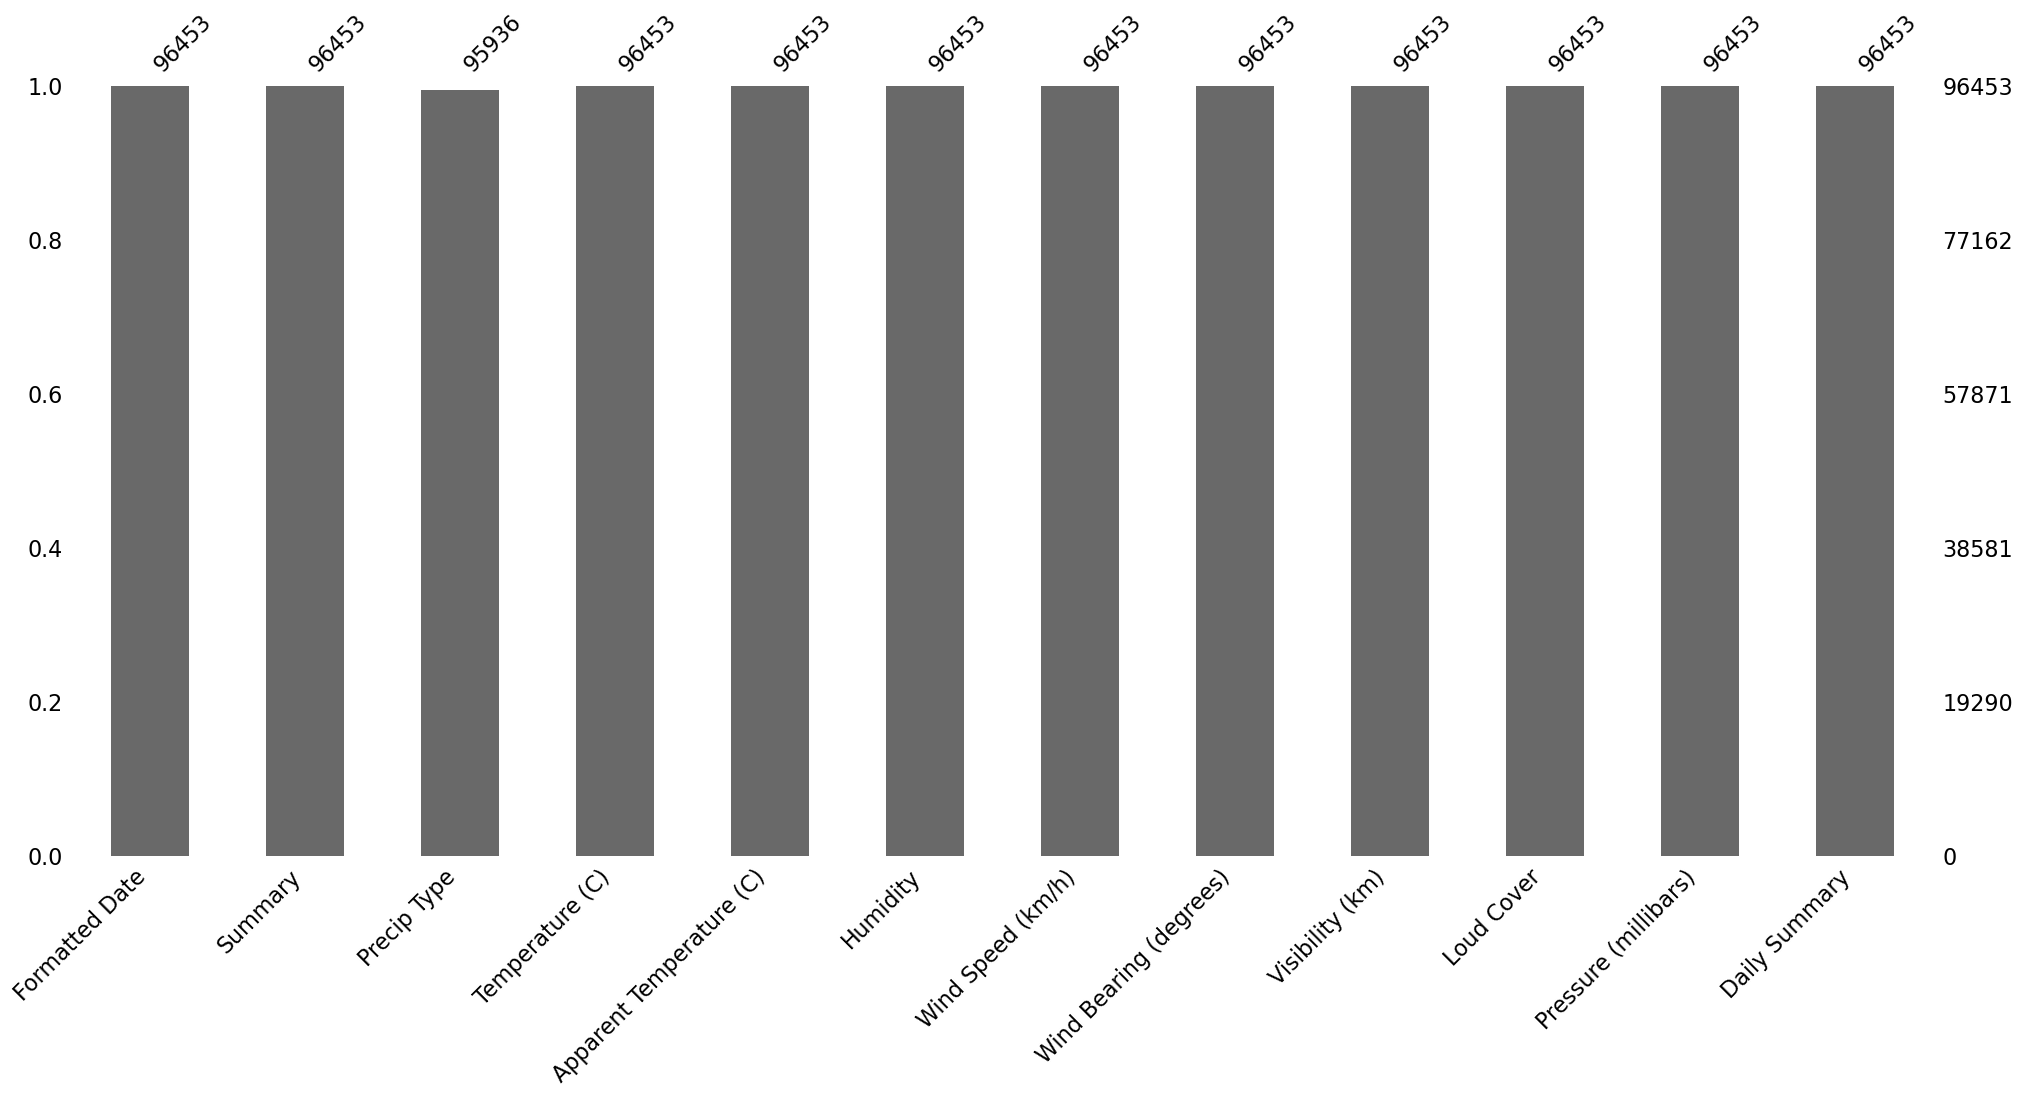

In [7]:
msno.bar(df)
plt.show()

## Target feature plot

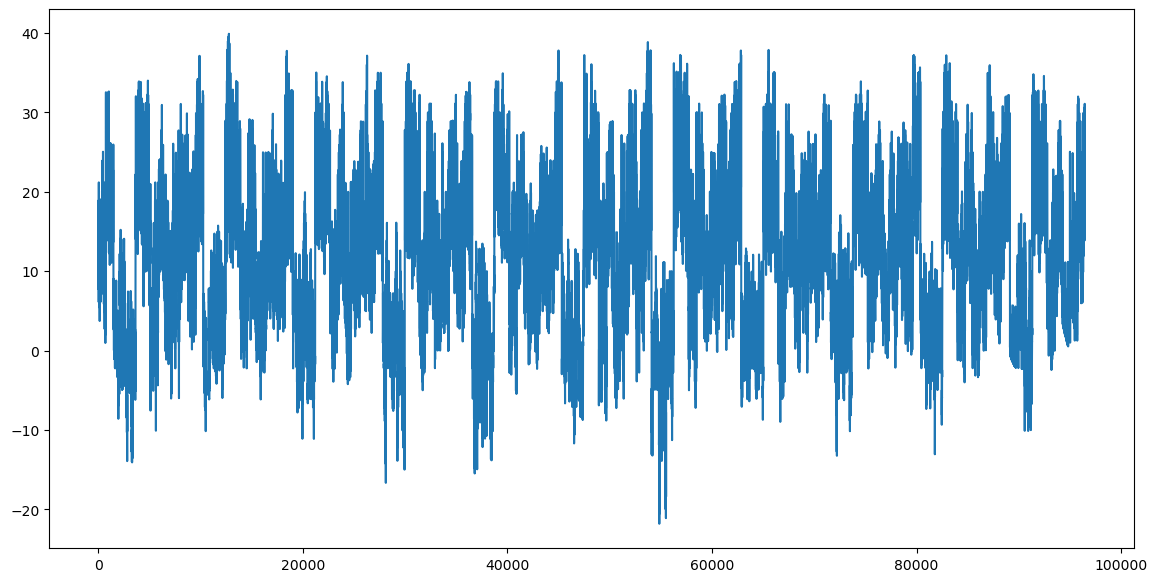

In [178]:
plt.figure(figsize = (14, 7))
df['Temperature (C)'].plot()
plt.show()

## A closer look at the target feature

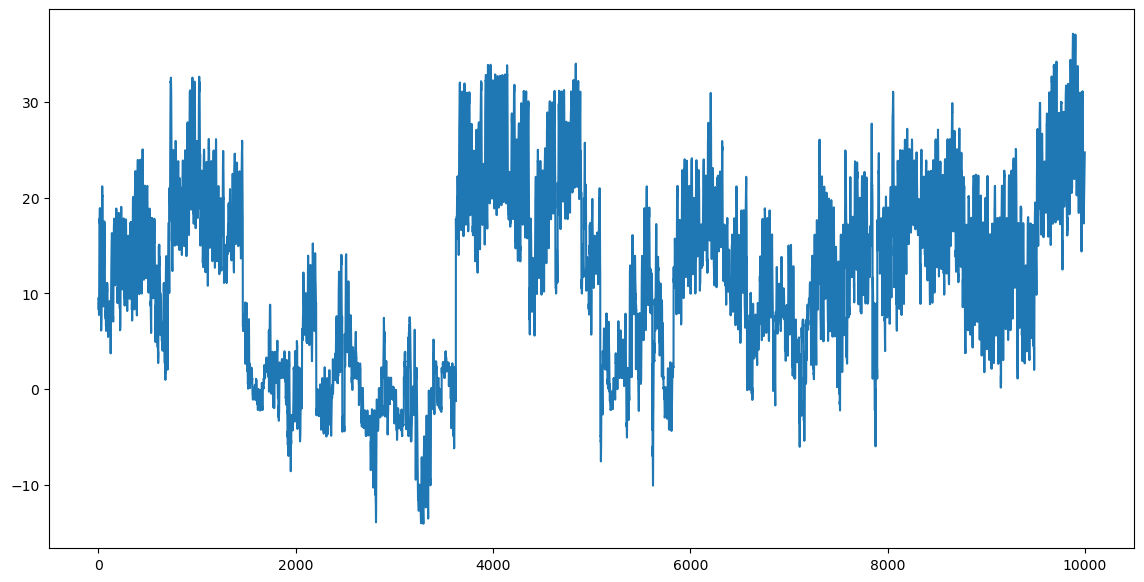

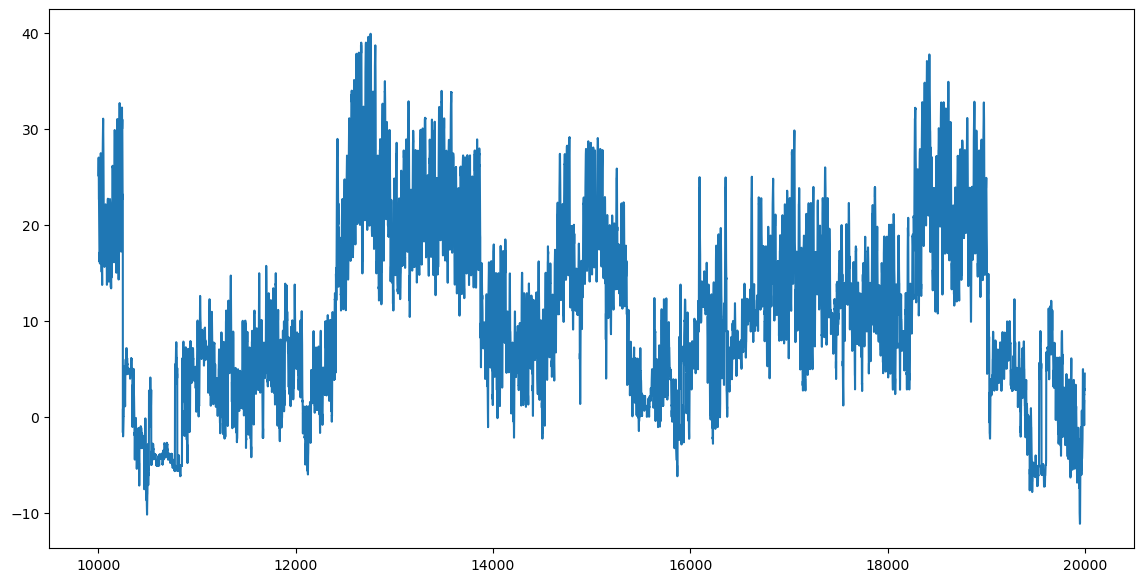

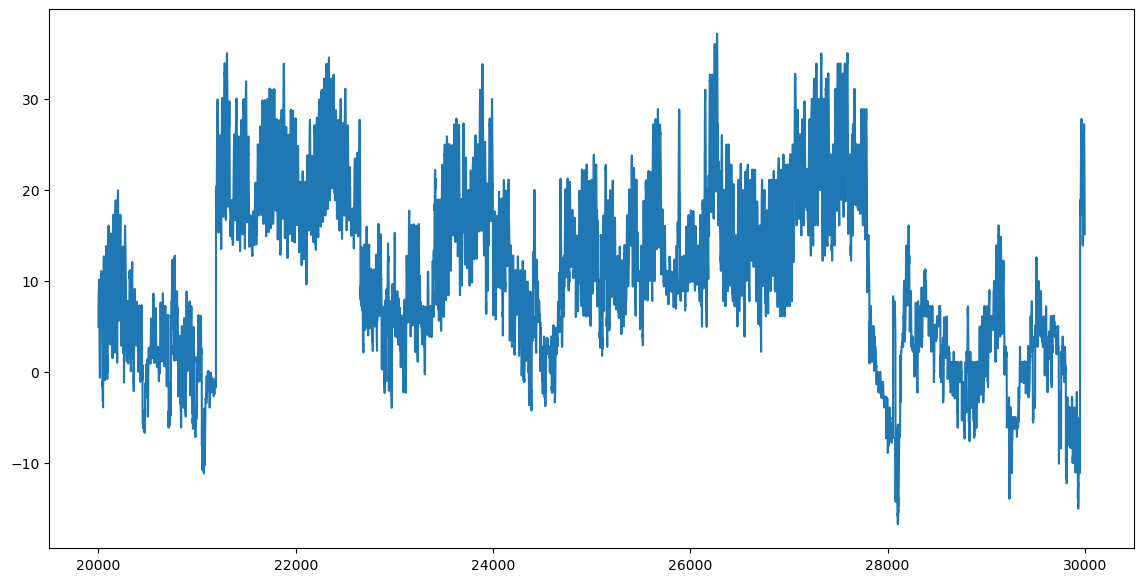

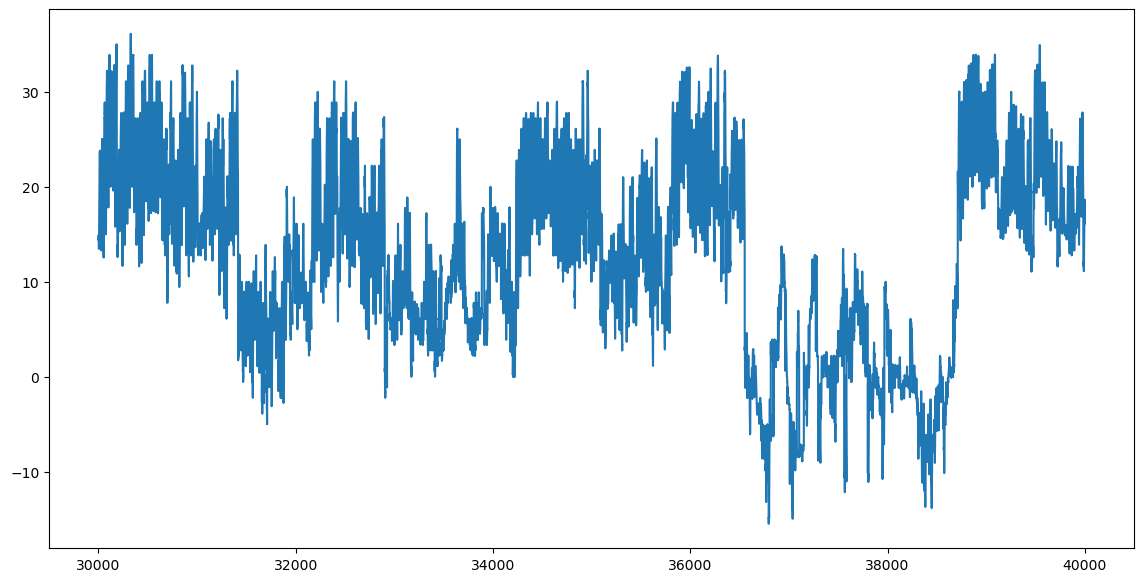

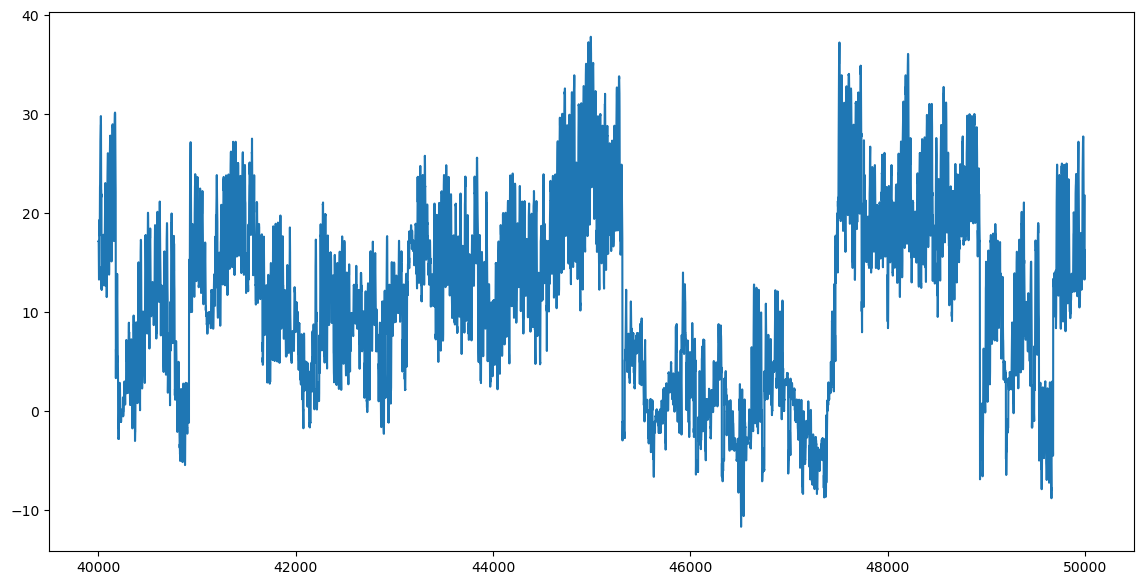

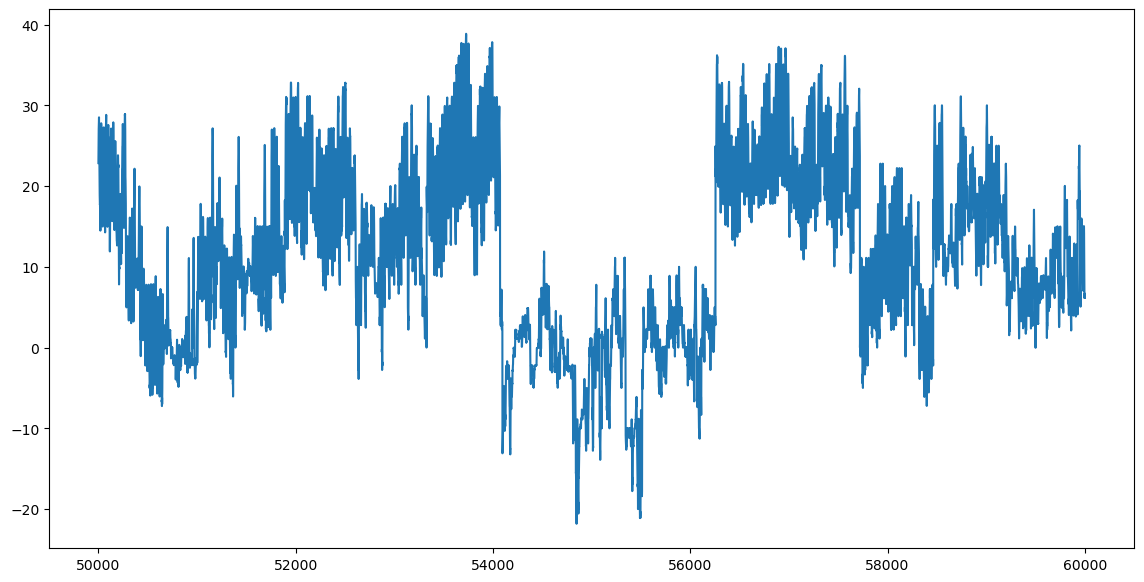

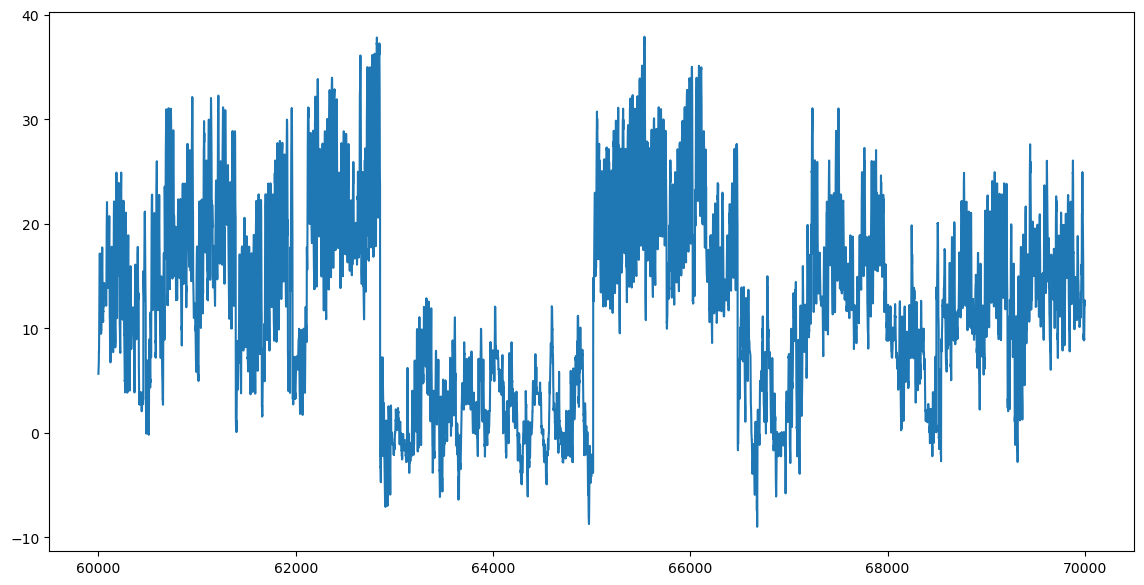

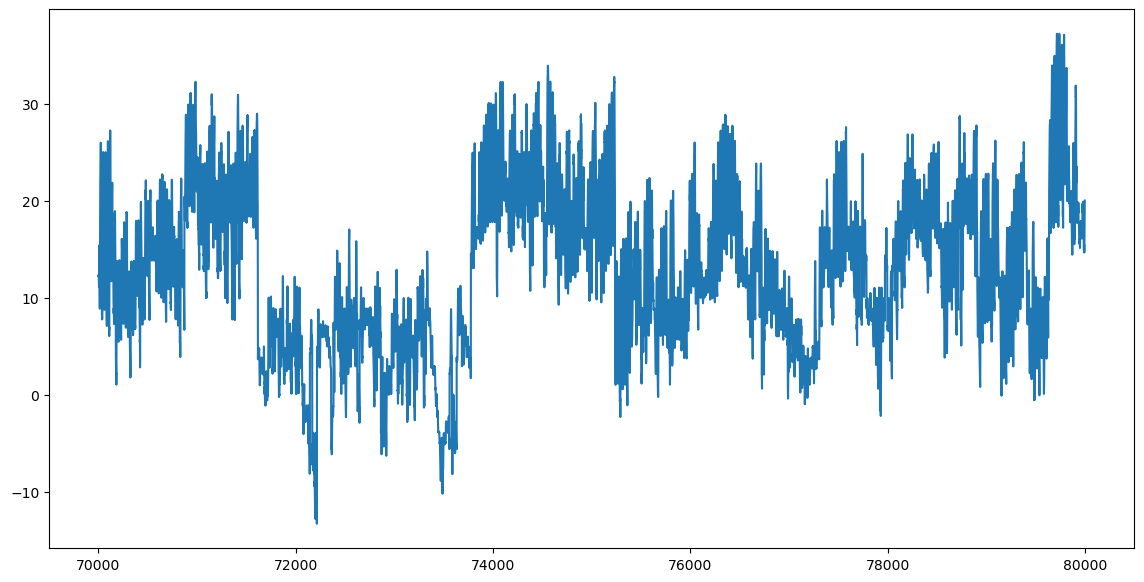

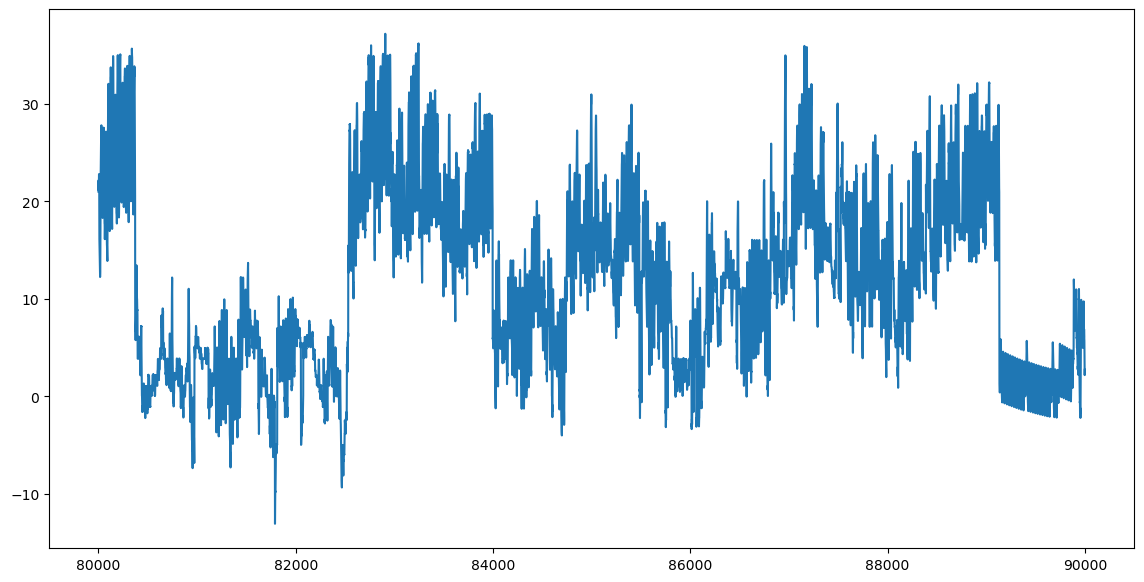

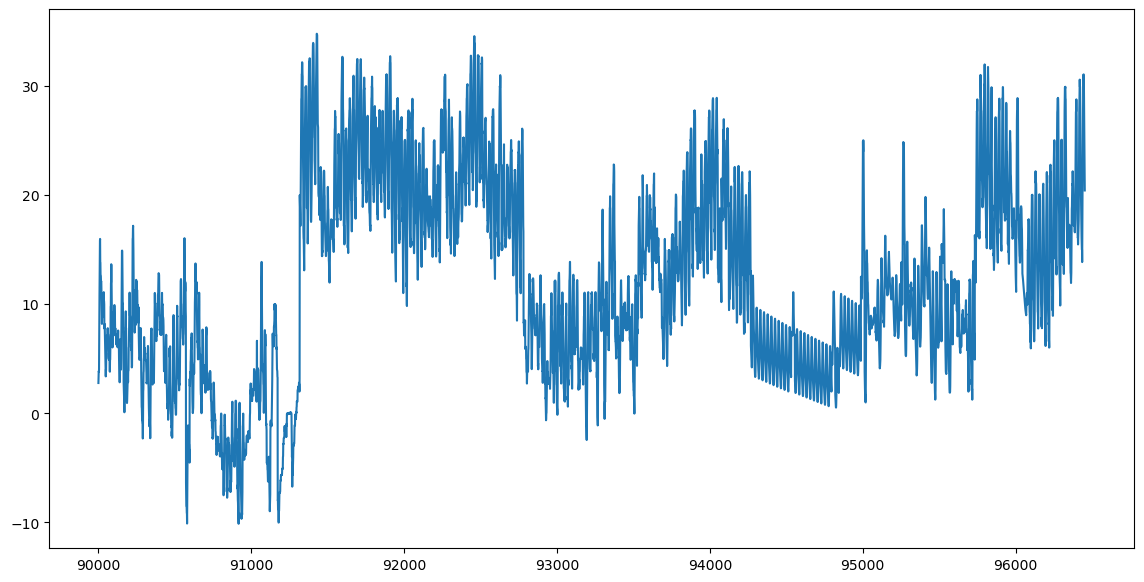

In [177]:
step = 10000
for i in range(0, len(df), step):
    plt.figure(figsize = (14, 7))
    df.iloc[i:i + step]['Temperature (C)'].plot()
    plt.show()

## Non-target features plots

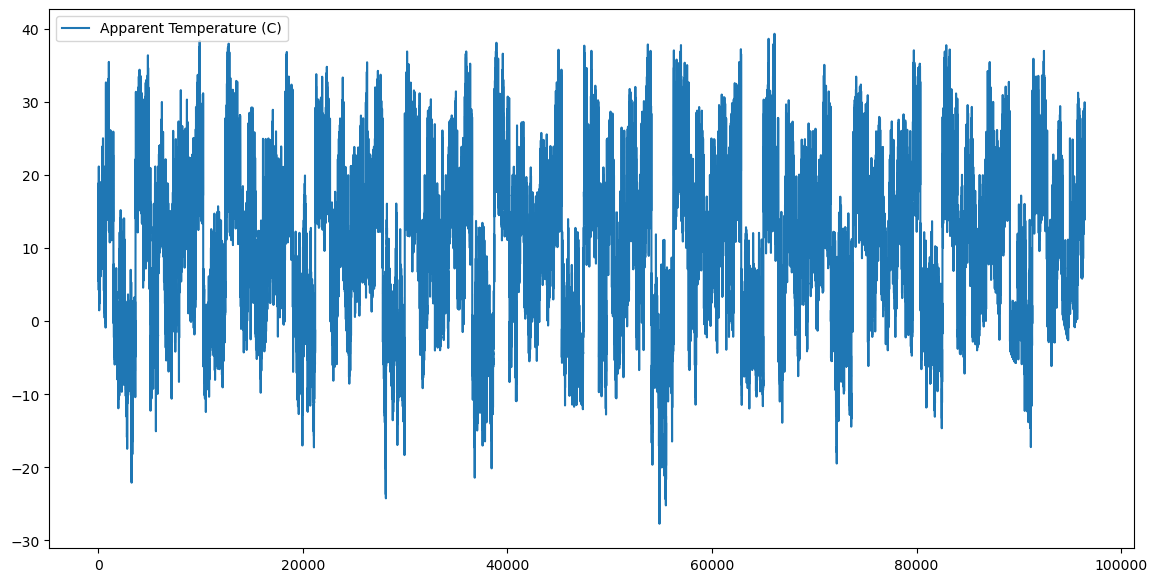

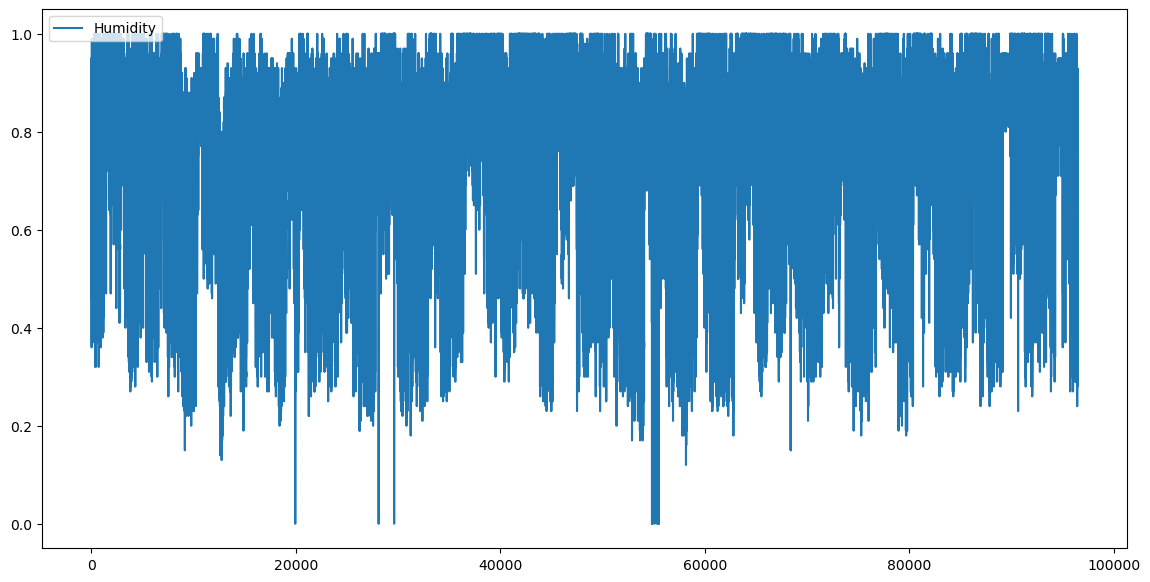

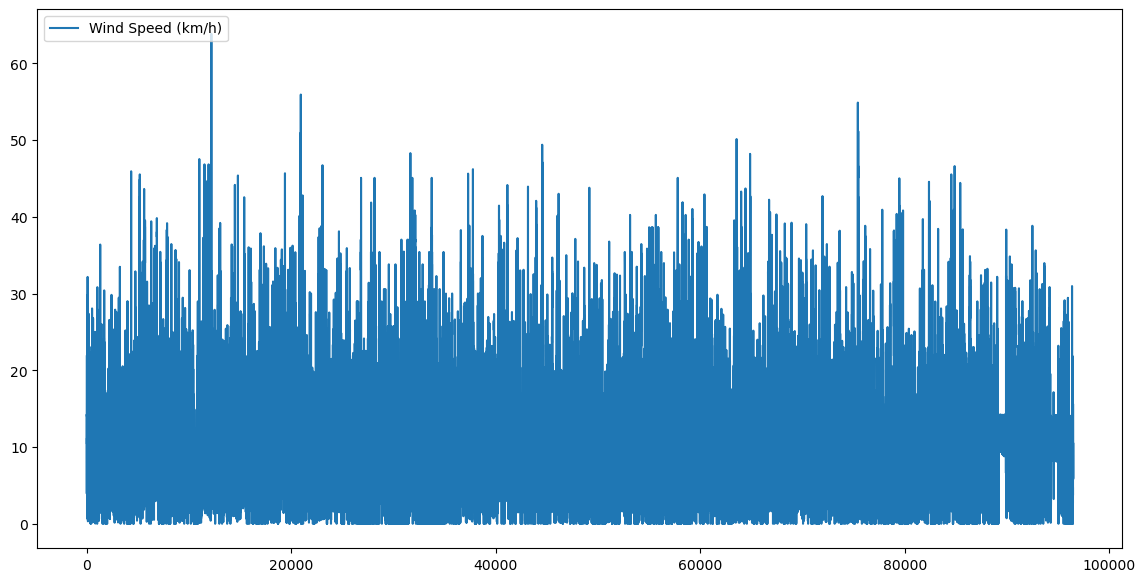

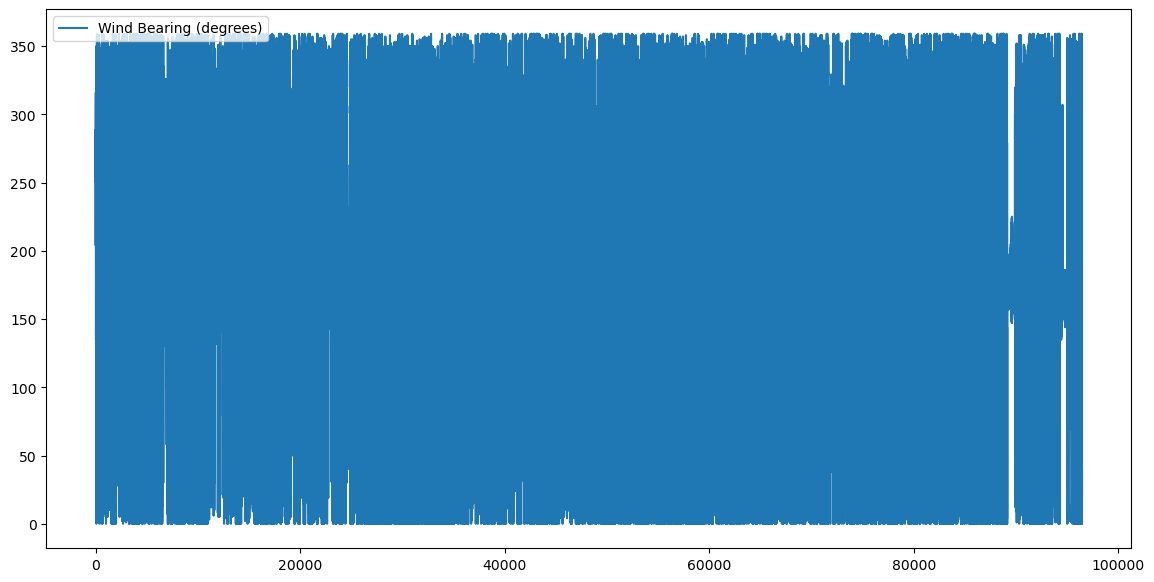

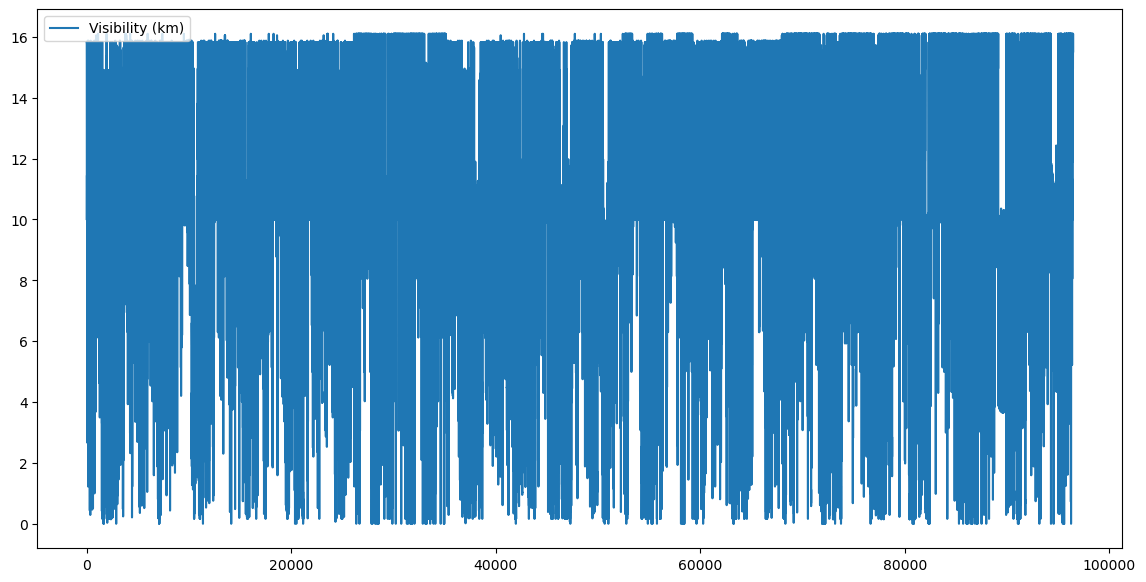

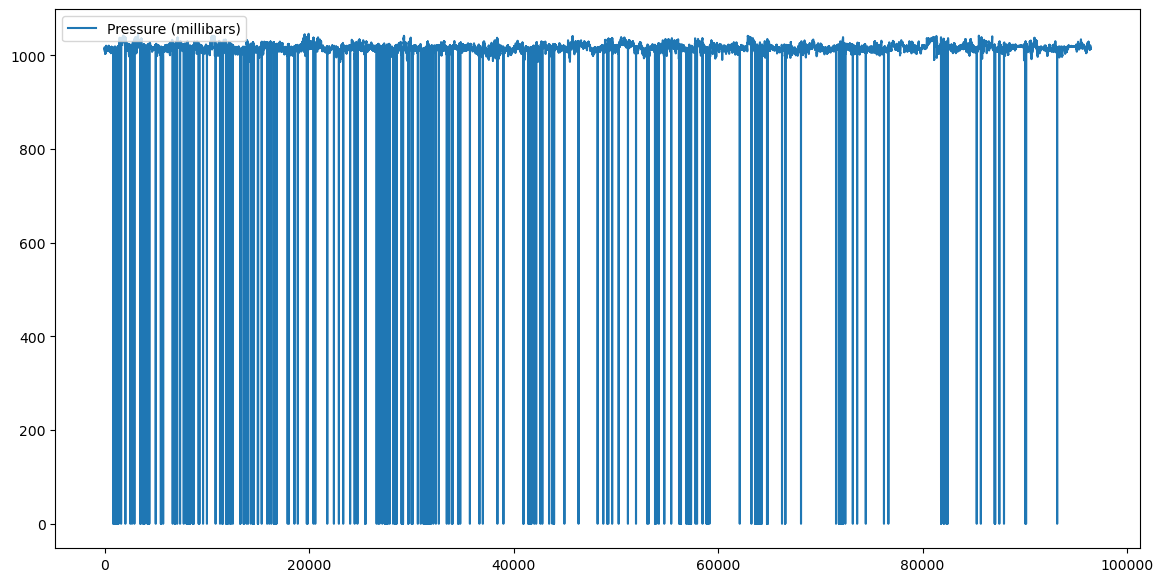

In [34]:
for column in df.drop(columns = ['Loud Cover', 'Temperature (C)']):
    if df[column].dtypes == 'object':
        continue
    plt.figure(figsize = (14, 7))    
    df[column].plot()
    plt.legend(loc = 'upper left')
    plt.show()

## Histograms

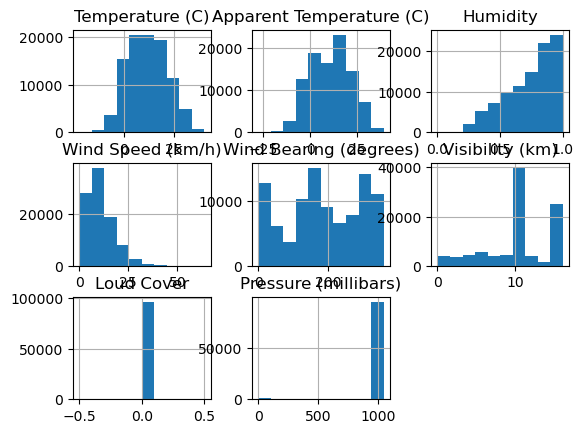

In [15]:
def plot_dataset_histograms(df):
    df.hist()
    plt.show()

plot_dataset_histograms(df)

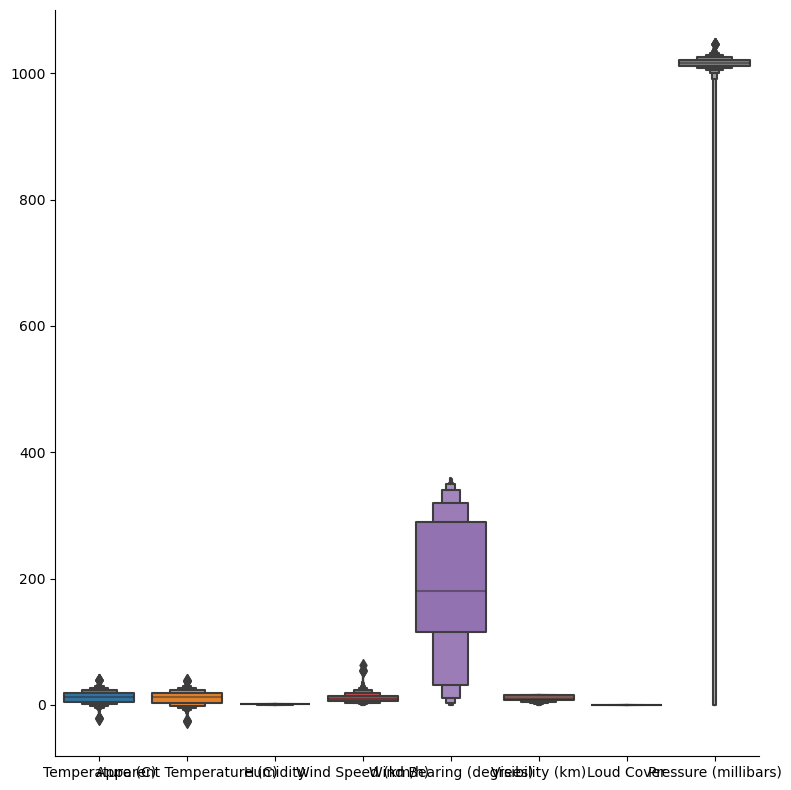

In [16]:
def show_cat_plot(df):
    sb.catplot(df, kind = 'boxen', height = 8)
    plt.show()

show_cat_plot(df)

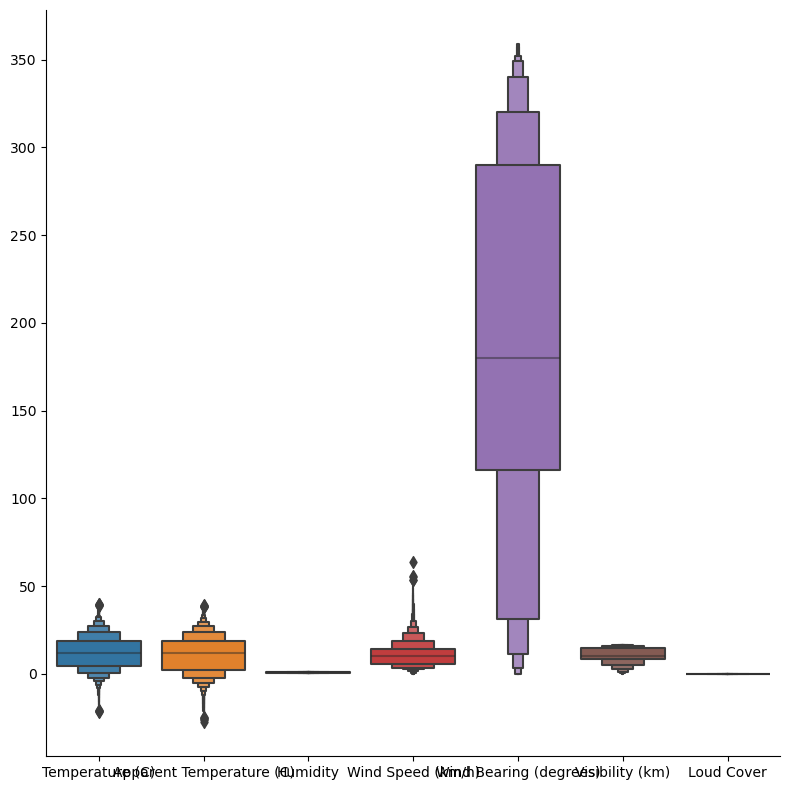

In [17]:
show_cat_plot(df.drop(columns = 'Pressure (millibars)'))

## Pair plot

<Figure size 1500x1500 with 0 Axes>

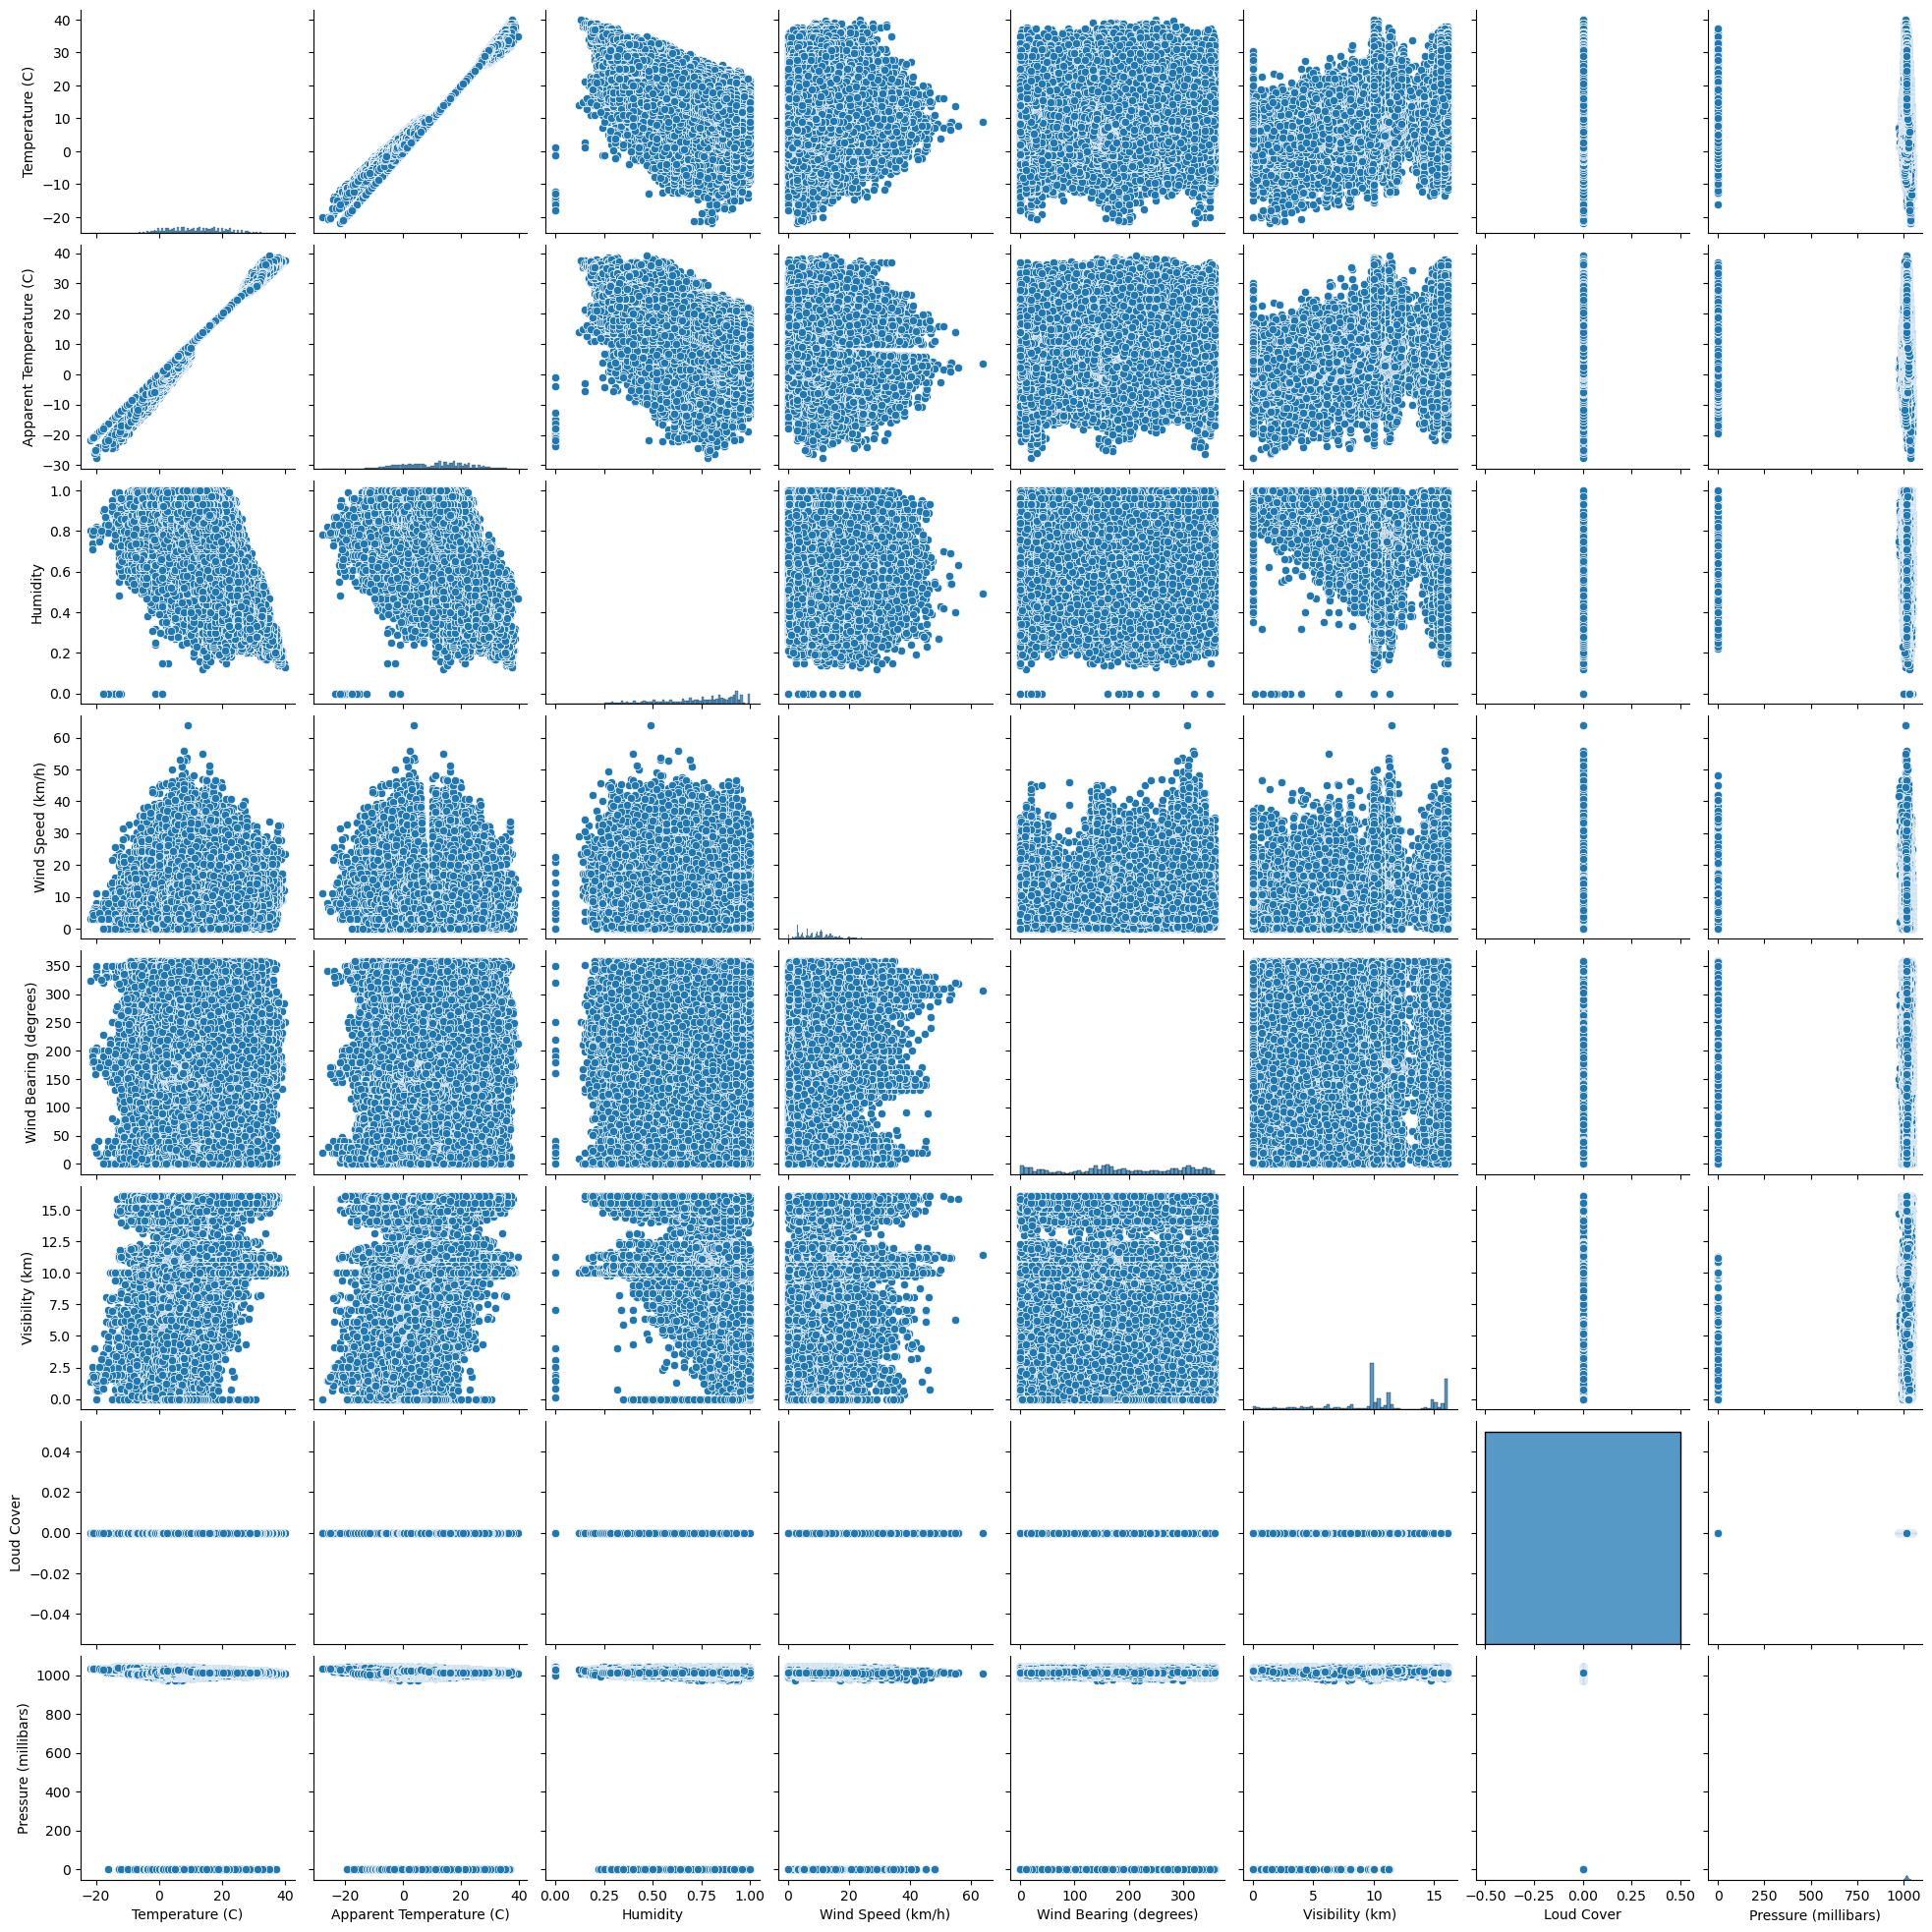

In [50]:
def show_pair_plot(df, figure_size = (15, 15), target_name = None):
    plt.figure(figsize = figure_size)
    df_without_object_columns = df.select_dtypes(exclude = ['object'])
    if target_name != None:
        sb.pairplot(df_without_object_columns, palette = 'tab10', hue = target_name)
    else:
        sb.pairplot(df_without_object_columns)
    plt.show()
    
show_pair_plot(df)

## Correlation map

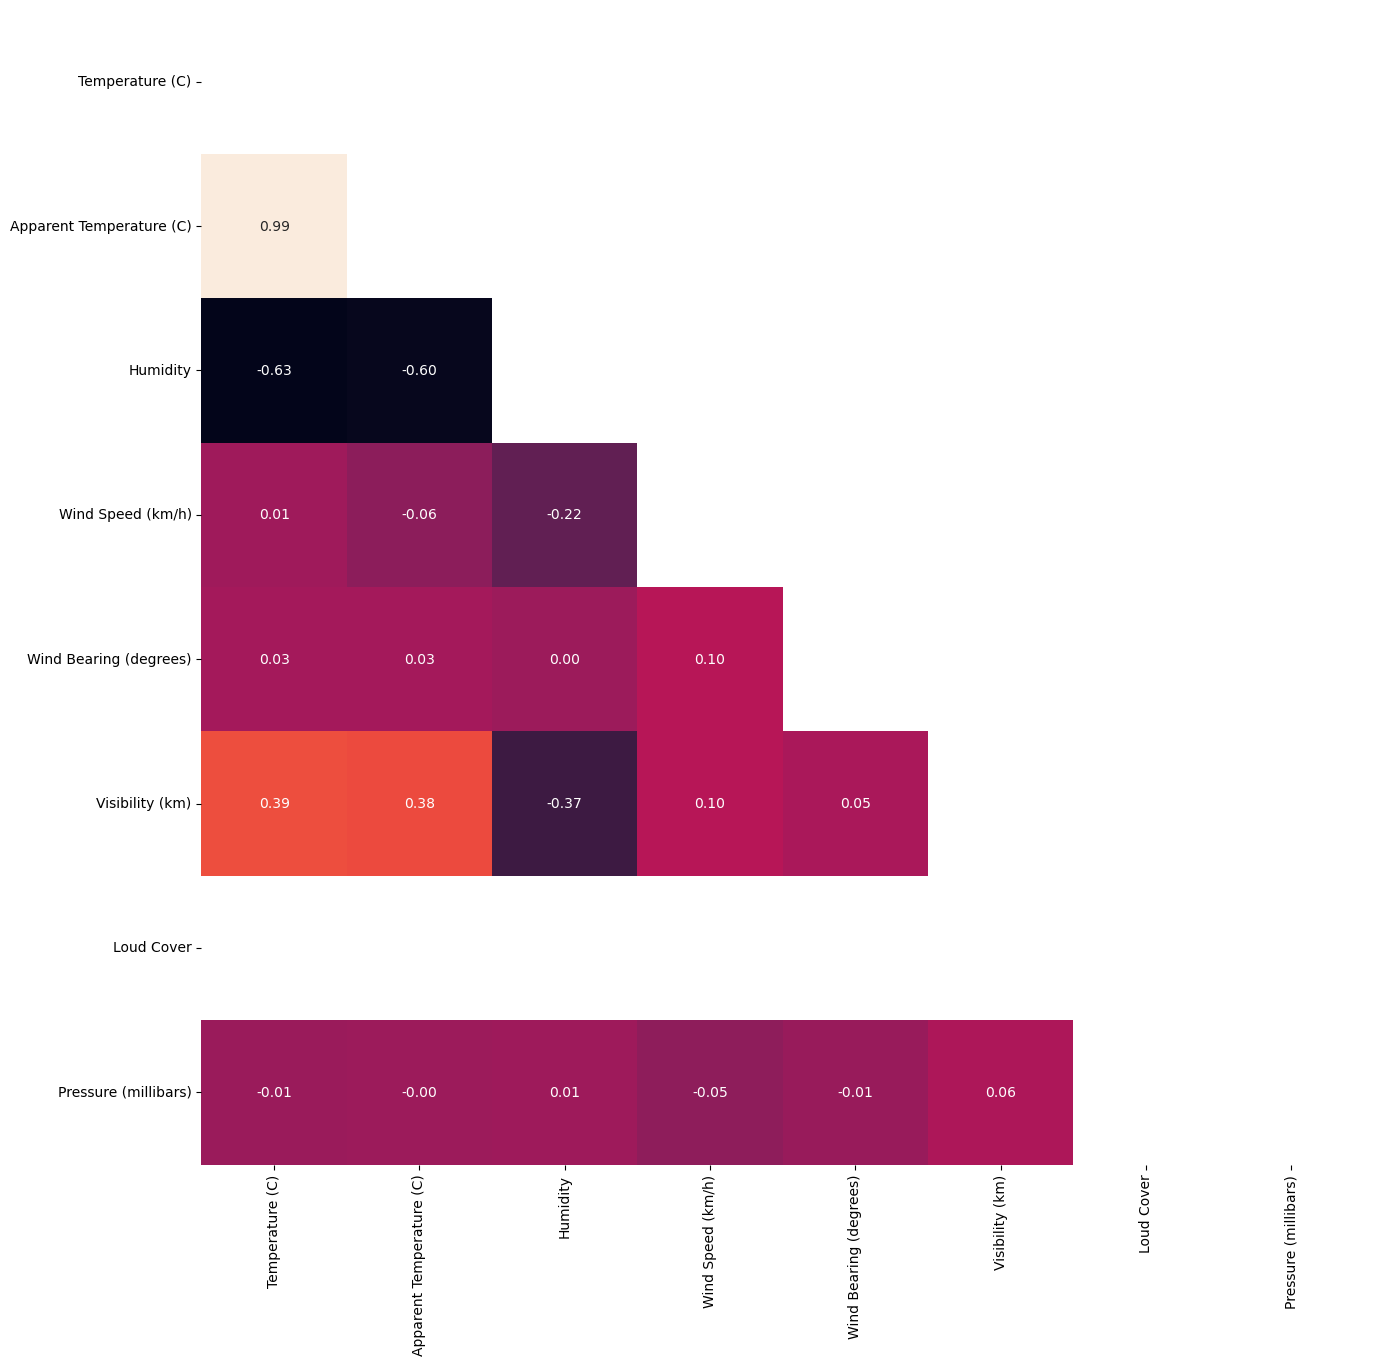

In [51]:
def show_correlation_map(df, figure_size = (15, 15)):
    plt.figure(figsize = figure_size)
    corr_matrix = df.select_dtypes(exclude = ['object']).corr()
    lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k = -1).astype(np.bool_))
    sb.heatmap(
        lower,
        annot = True,
        fmt = '.2f',
        cbar = False)
    plt.show()
    
show_correlation_map(df)

## Summaries showcase

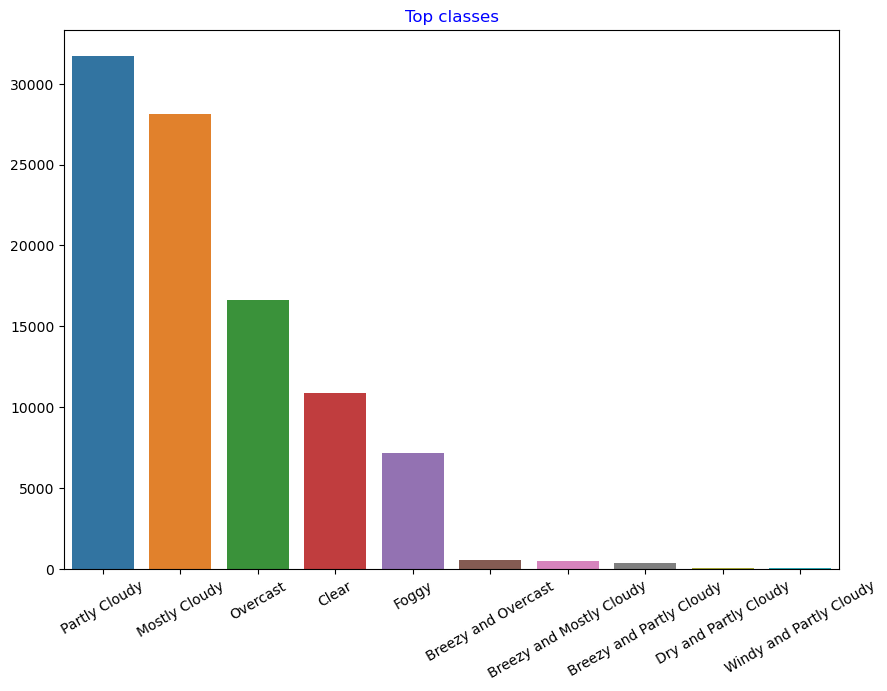

In [84]:
def show_top_classes(df, column, num_of_top_classes = None):
    top = df[column].value_counts()
    if num_of_top_classes != None:
        top = top[:num_of_top_classes]
    plt.figure(figsize = (10, 7))
    sb.barplot(x = top.index, y = top.values)
    plt.xticks(rotation = 30)
    plt.title('Top classes', color = 'blue')
    plt.show()
    
show_top_classes(df, 'Summary', 10)

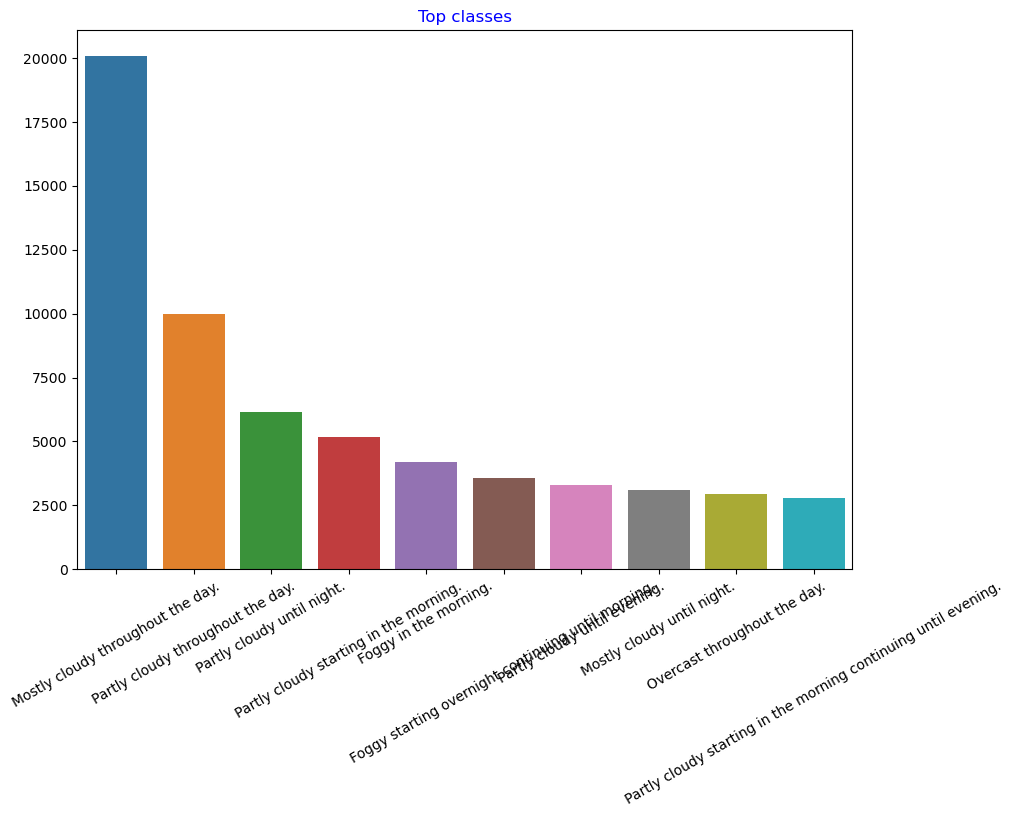

In [83]:
show_top_classes(df, 'Daily Summary', 10)

## Exploring autocorrelation & partial autocorrelation

### Autocorrelation

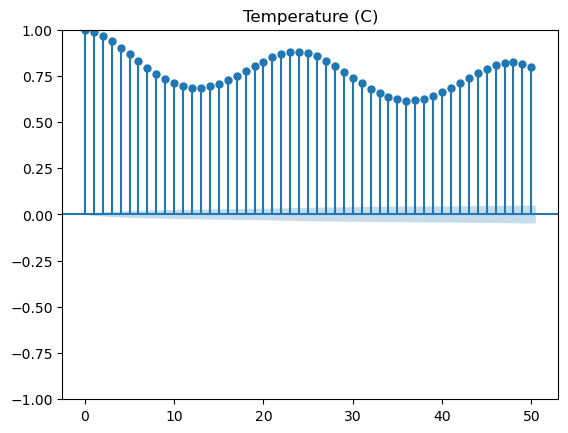

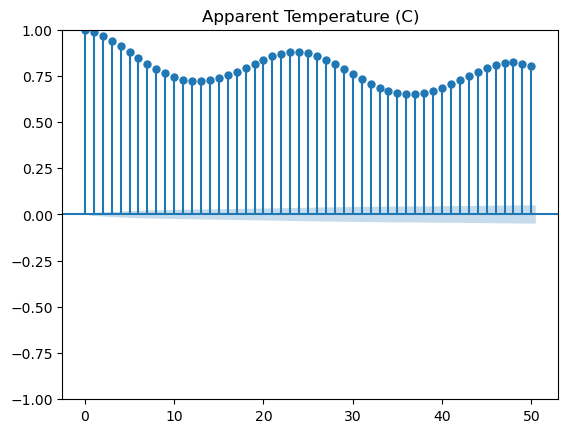

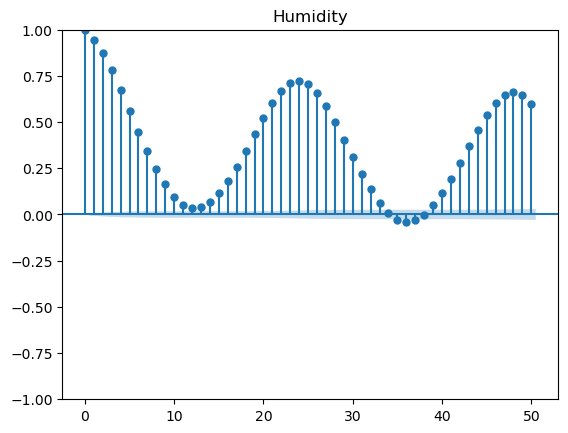

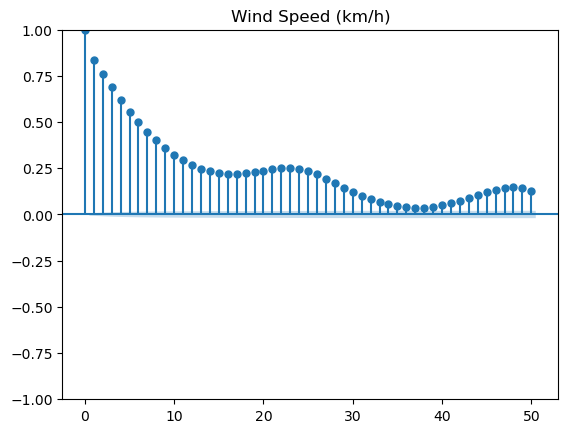

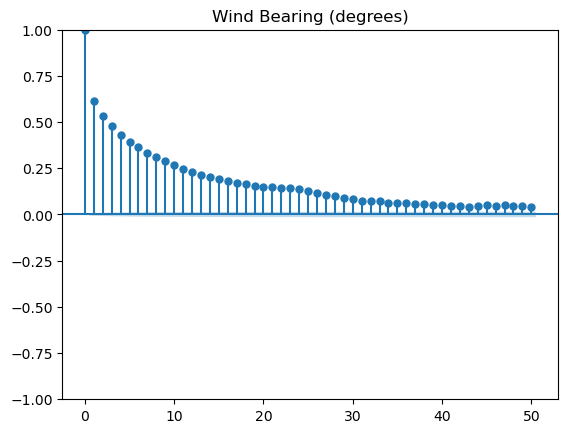

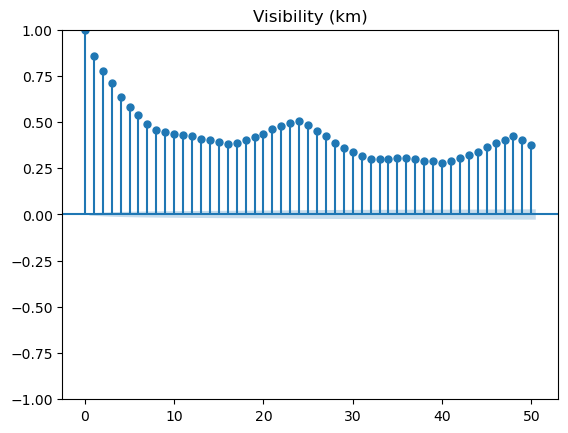

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


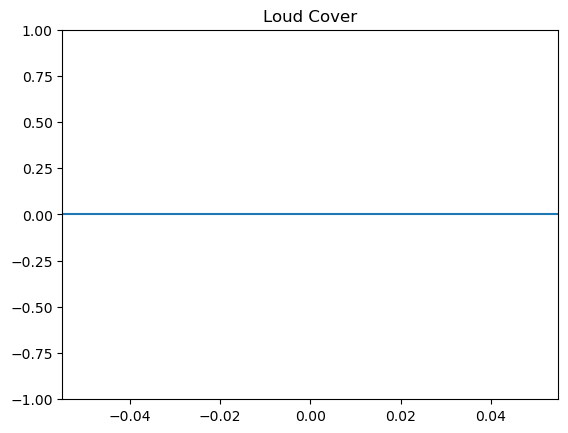

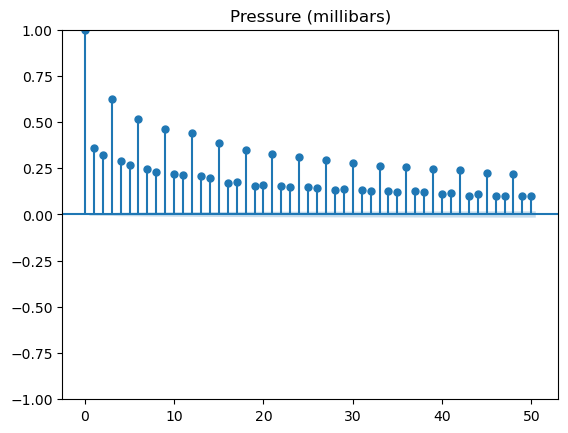

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

for column in df:
    if df[column].dtypes == 'object':
        continue
    plot_acf(df[column].to_numpy(), title = column)
    plt.show()

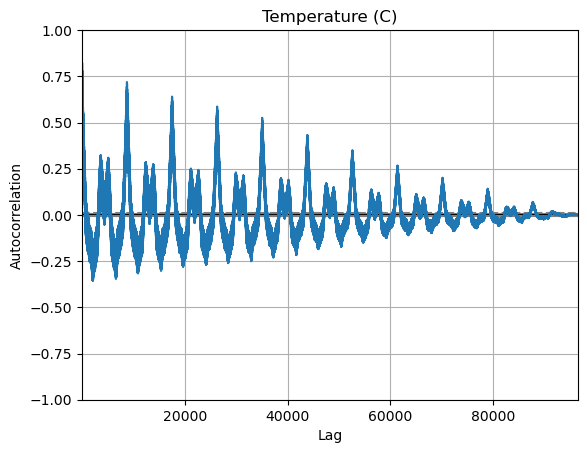

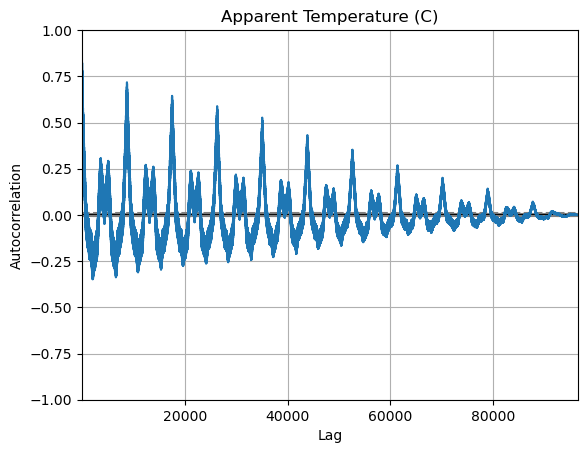

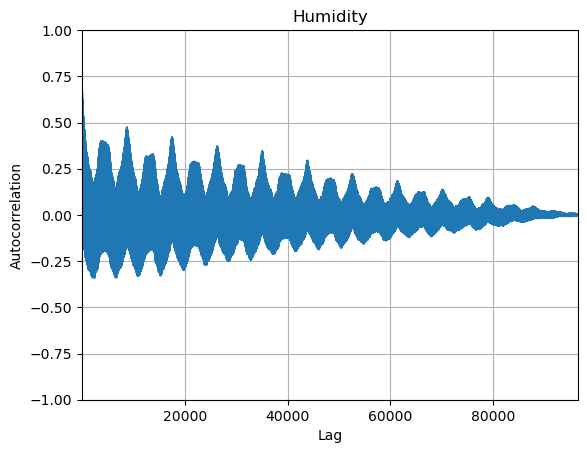

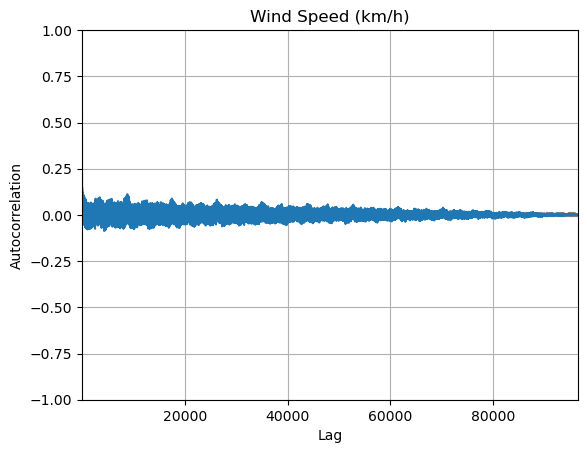

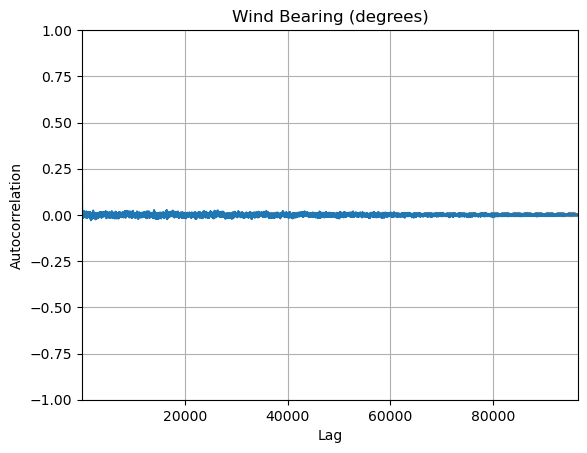

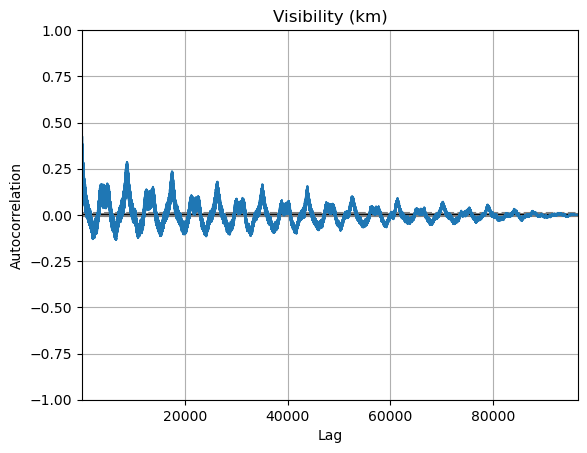

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:460: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / n / c0


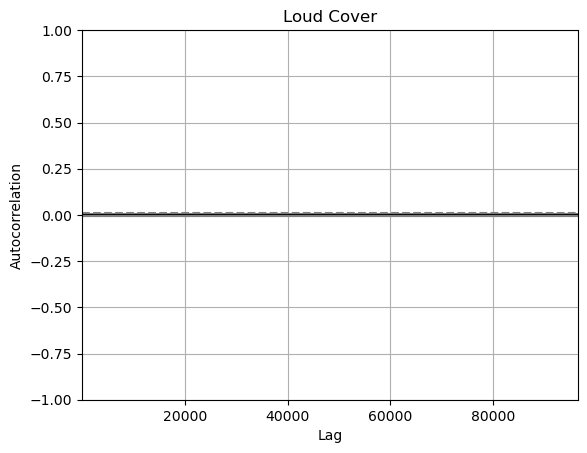

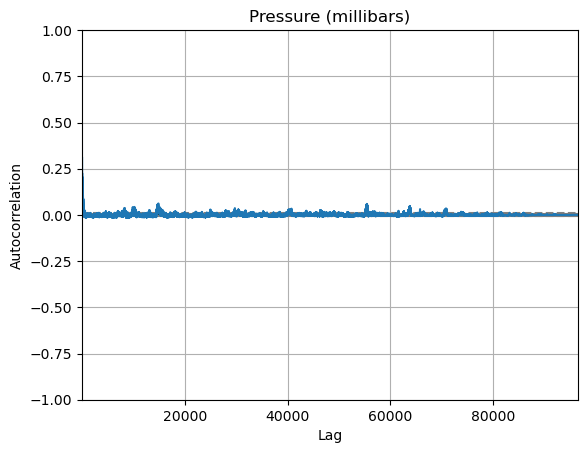

In [19]:
from pandas.plotting import autocorrelation_plot

for column in df:
    if df[column].dtypes == 'object':
        continue
    plt.title(column)
    autocorrelation_plot(df[column])
    plt.show()

### Partial autocorrelation

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


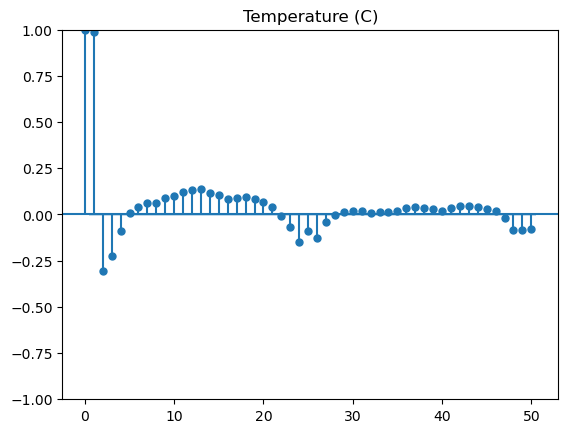

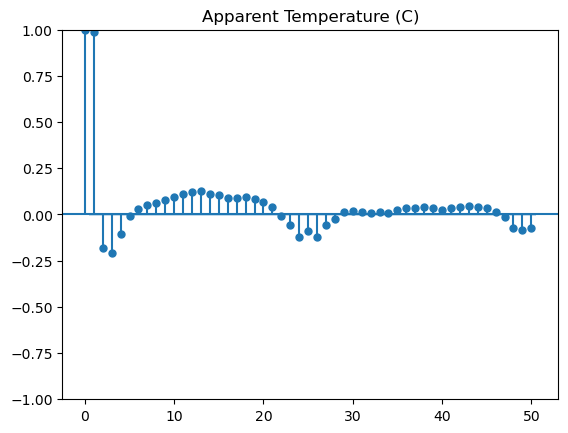

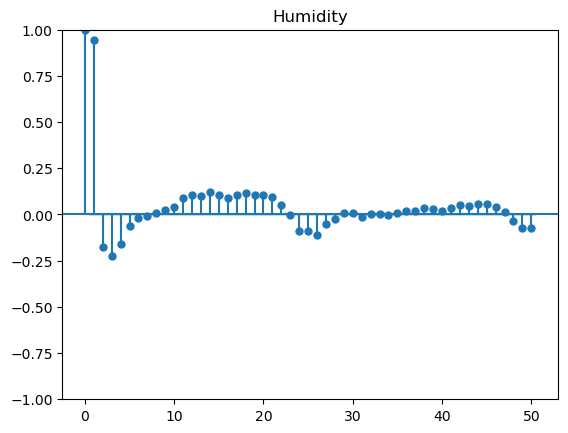

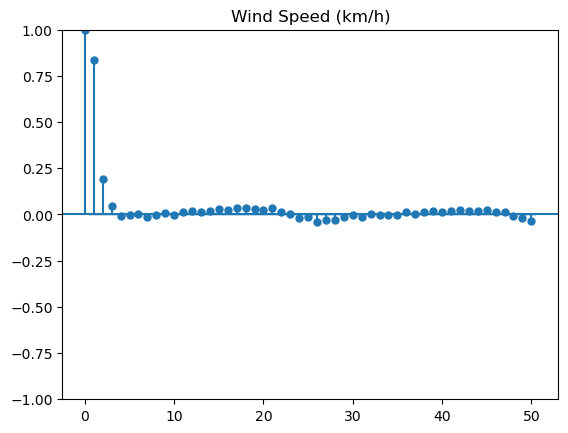

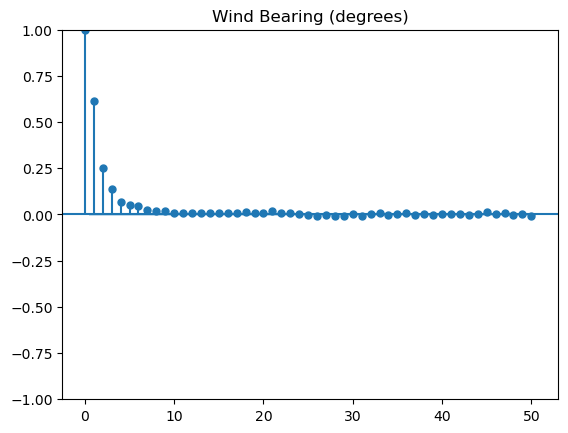

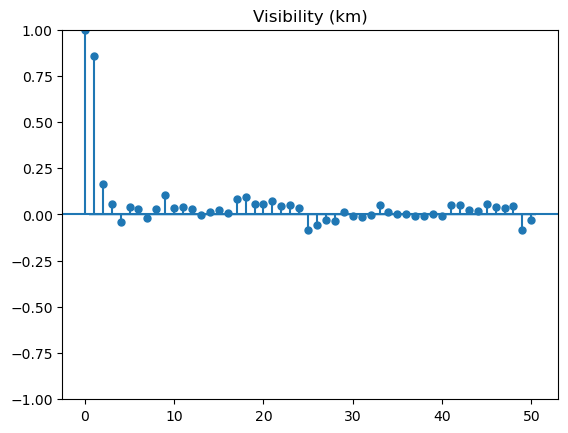

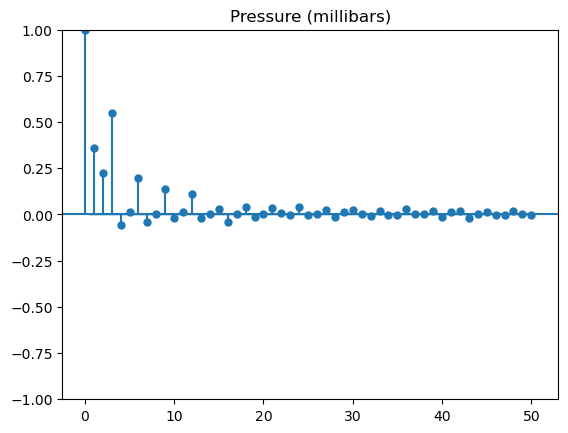

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

for column in df.drop(columns = 'Loud Cover'):
    if df[column].dtypes == 'object':
        continue
    plot_pacf(df[column].to_numpy(), title = column)
    plt.show()

### Seasonal decomposition for the target feature

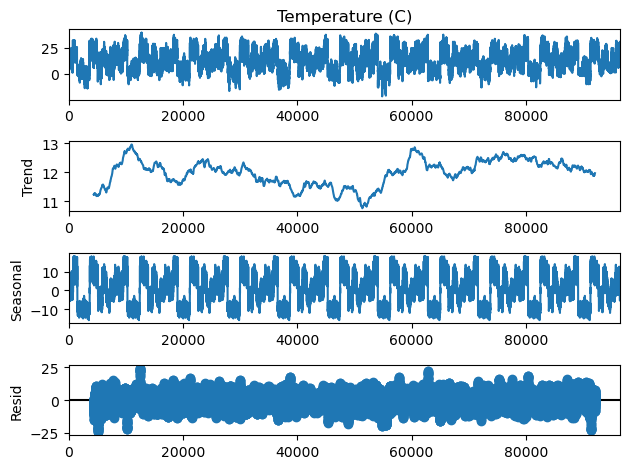

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df['Temperature (C)'], period = 365 * 24, model ='additive').plot()
plt.show()

# Preprocessing

In [5]:
df_orig = df.copy()

## Setting the index

In [6]:
df = df_orig.copy()
df.rename(columns = {'Formatted Date': 'Datetime'}, inplace = True)
df['Datetime'] = pd.to_datetime(df['Datetime'], utc = True)
df.drop_duplicates(subset = 'Datetime', inplace = True)
df = df.set_index('Datetime')
df = df.asfreq('1H')
df.sort_index(inplace = True)
df

Summary Precip Type  Temperature (C)  \
Datetime                                                                
2005-12-31 23:00:00+00:00  Partly Cloudy        rain         0.577778   
2006-01-01 00:00:00+00:00  Mostly Cloudy        rain         1.161111   
2006-01-01 01:00:00+00:00  Mostly Cloudy        rain         1.666667   
2006-01-01 02:00:00+00:00       Overcast        rain         1.711111   
2006-01-01 03:00:00+00:00  Mostly Cloudy        rain         1.183333   
...                                  ...         ...              ...   
2016-12-31 18:00:00+00:00  Mostly Cloudy        rain         0.488889   
2016-12-31 19:00:00+00:00  Mostly Cloudy        rain         0.072222   
2016-12-31 20:00:00+00:00  Mostly Cloudy        snow        -0.233333   
2016-12-31 21:00:00+00:00  Mostly Cloudy        snow        -0.472222   
2016-12-31 22:00:00+00:00  Mostly Cloudy        snow        -0.677778   

                           Apparent Temperature (C)  Humidity  \
Datetime                                                        
2005-12-31 23:00:00+00:00                 -4.050000      0.89   
2006-01-01 00:00:00+00:00                 -3.238889      0.85   
2006-01-01 01:00:00+00:00                 -3.155556      0.82   
2006-01-01 02:00:00+00:00                 -2.194444      0.82   
2006-01-01 03:00:00+00:00                 -2.744444      0.86   
...                                             ...       ...   
2016-12-31 18:00:00+00:00                 -2.644444      0.86   
2016-12-31 19:00:00+00:00                 -3.050000      0.88   
2016-12-31 20:00:00+00:00                 -3.377778      0.89   
2016-12-31 21:00:00+00:00                 -3.644444      0.91   
2016-12-31 22:00:00+00:00                 -3.888889      0.92   

                           Wind Speed (km/h)  Wind Bearing (degrees)  \
Datetime                                                               
2005-12-31 23:00:00+00:00            17.1143                   140.0   
2006-01-01 00:00:00+00:00            16.6152                   139.0   
2006-01-01 01:00:00+00:00            20.2538                   140.0   
2006-01-01 02:00:00+00:00            14.4900                   140.0   
2006-01-01 03:00:00+00:00            13.9426                   134.0   
...                                      ...                     ...   
2016-12-31 18:00:00+00:00             9.7566                   167.0   
2016-12-31 19:00:00+00:00             9.4185                   169.0   
2016-12-31 20:00:00+00:00             9.2736                   175.0   
2016-12-31 21:00:00+00:00             9.2414                   182.0   
2016-12-31 22:00:00+00:00             9.2253                   189.0   

                           Visibility (km)  Loud Cover  Pressure (millibars)  \
Datetime                                                                       
2005-12-31 23:00:00+00:00           9.9820         0.0               1016.66   
2006-01-01 00:00:00+00:00           9.9015         0.0               1016.15   
2006-01-01 01:00:00+00:00           9.9015         0.0               1015.87   
2006-01-01 02:00:00+00:00           9.9015         0.0               1015.56   
2006-01-01 03:00:00+00:00           9.9015         0.0               1014.98   
...                                    ...         ...                   ...   
2016-12-31 18:00:00+00:00           8.0178         0.0               1020.03   
2016-12-31 19:00:00+00:00           7.2450         0.0               1020.27   
2016-12-31 20:00:00+00:00           9.5795         0.0               1020.50   
2016-12-31 21:00:00+00:00           8.4042         0.0               1020.65   
2016-12-31 22:00:00+00:00           8.8711         0.0               1020.72   

                                               Daily Summary  
Datetime                                                      
2005-12-31 23:00:00+00:00  Mostly cloudy throughout the day.  
2006-01-01 00:00:00+00:00  Mostly cloudy throughout the day.  
2006-01

In [7]:
def verify_index(df):
    try:
        return (df.index == pd.date_range(start = df.index.min(), end = df.index.max(), freq = df.index.freq)).all()
    except:
        print("Error: can't verify temporary index")
        return False
    
verify_index(df)

True

In [8]:
diff = len(df_orig) - len(df)
print(f'Amount of removed rows: {diff}')

Amount of removed rows: 21


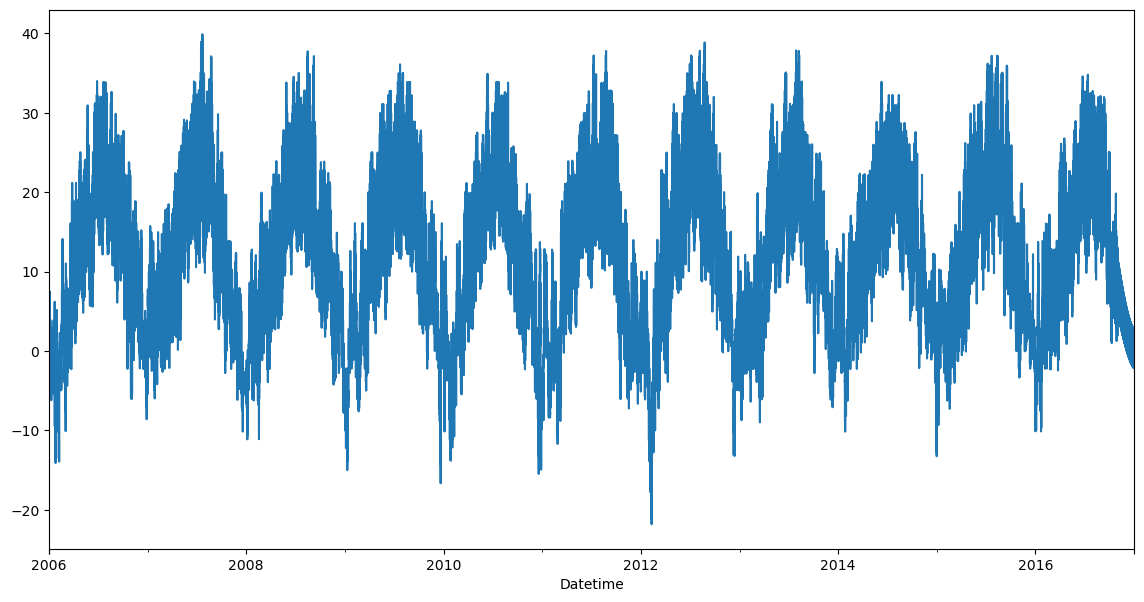

In [200]:
plt.figure(figsize = (14, 7))
df['Temperature (C)'].plot()
plt.show()

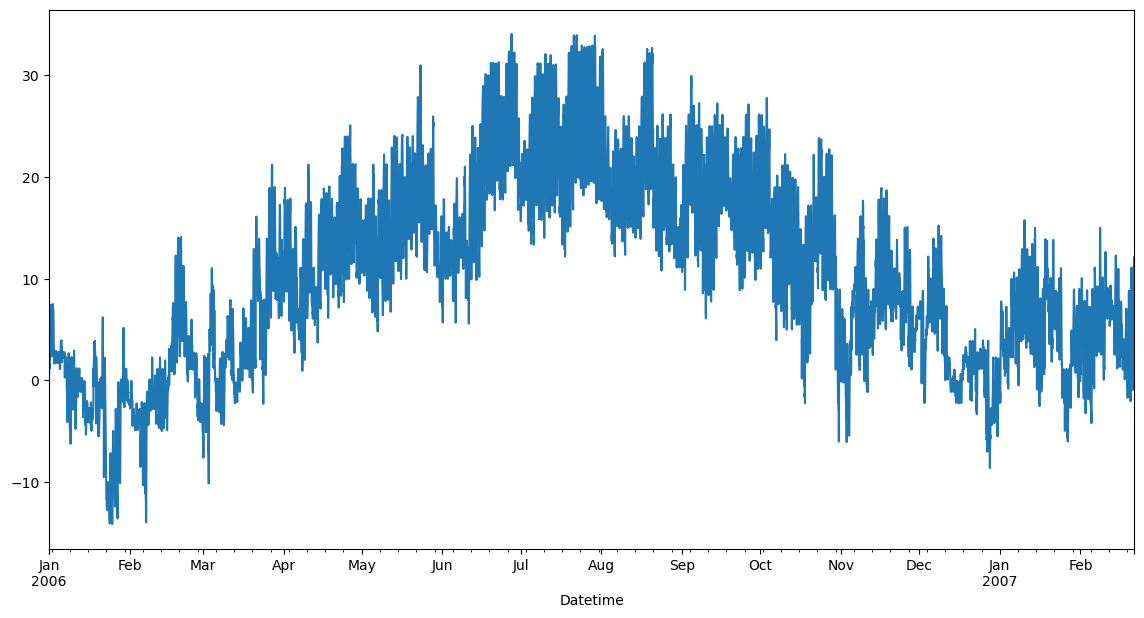

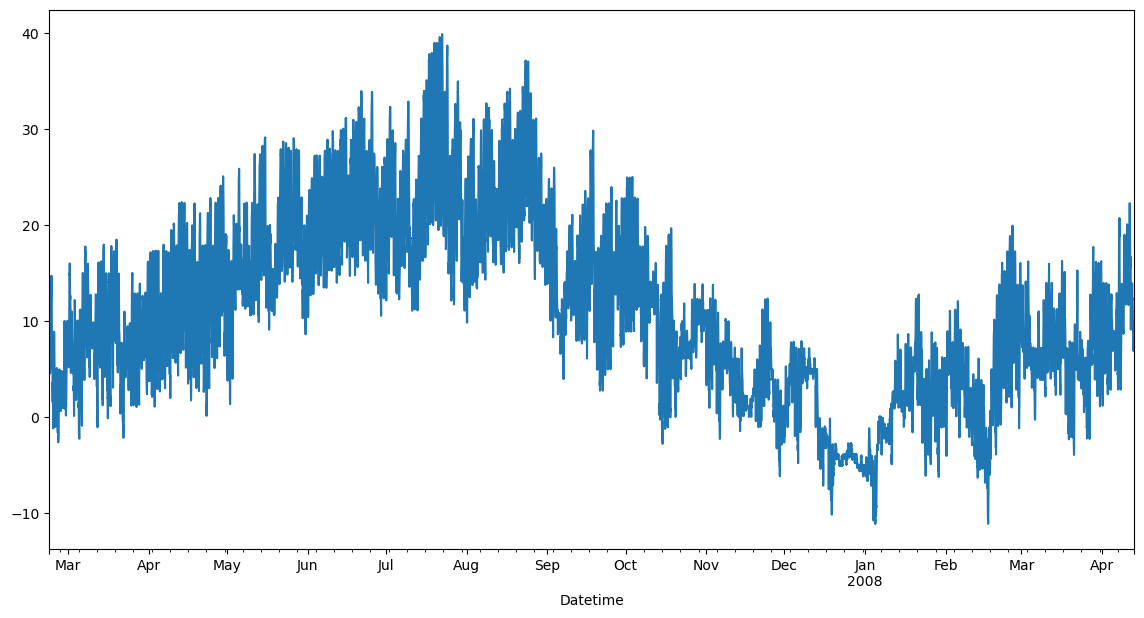

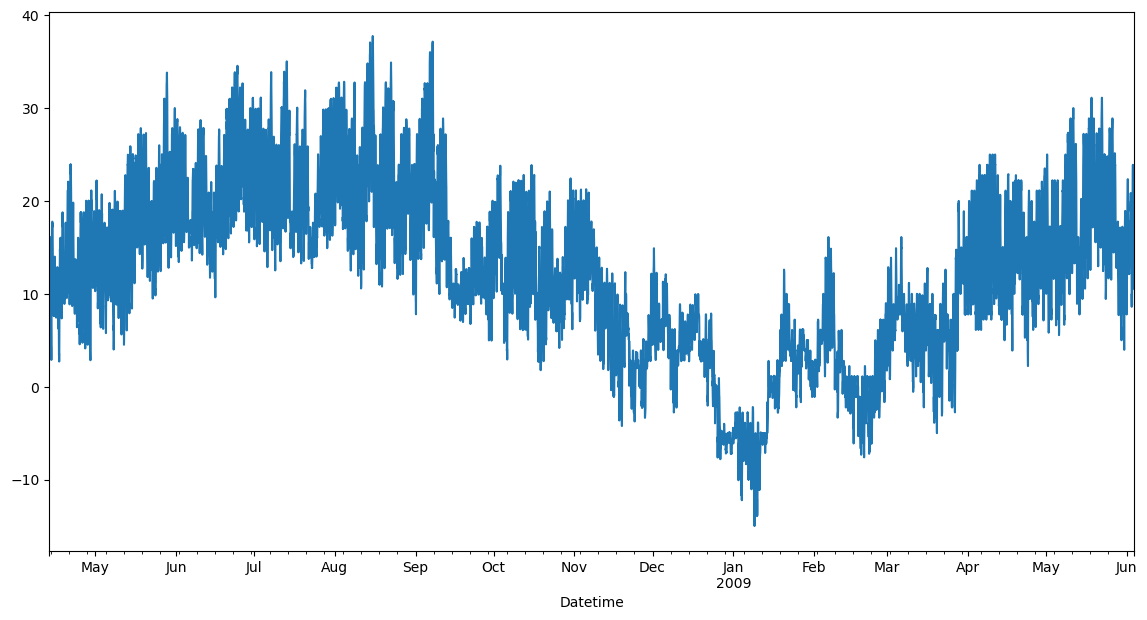

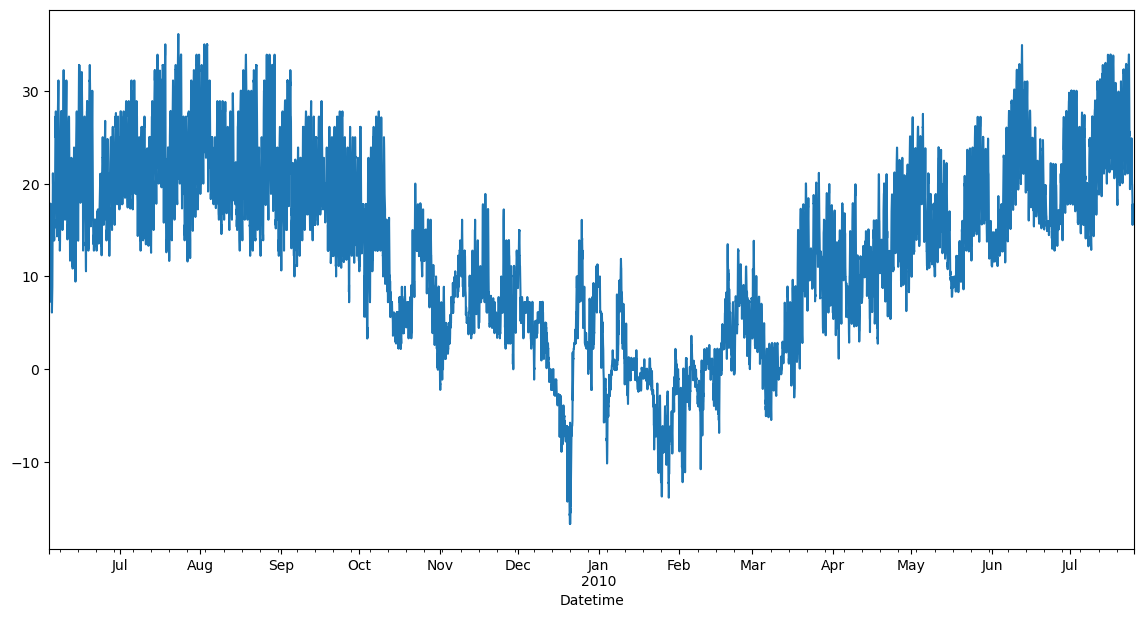

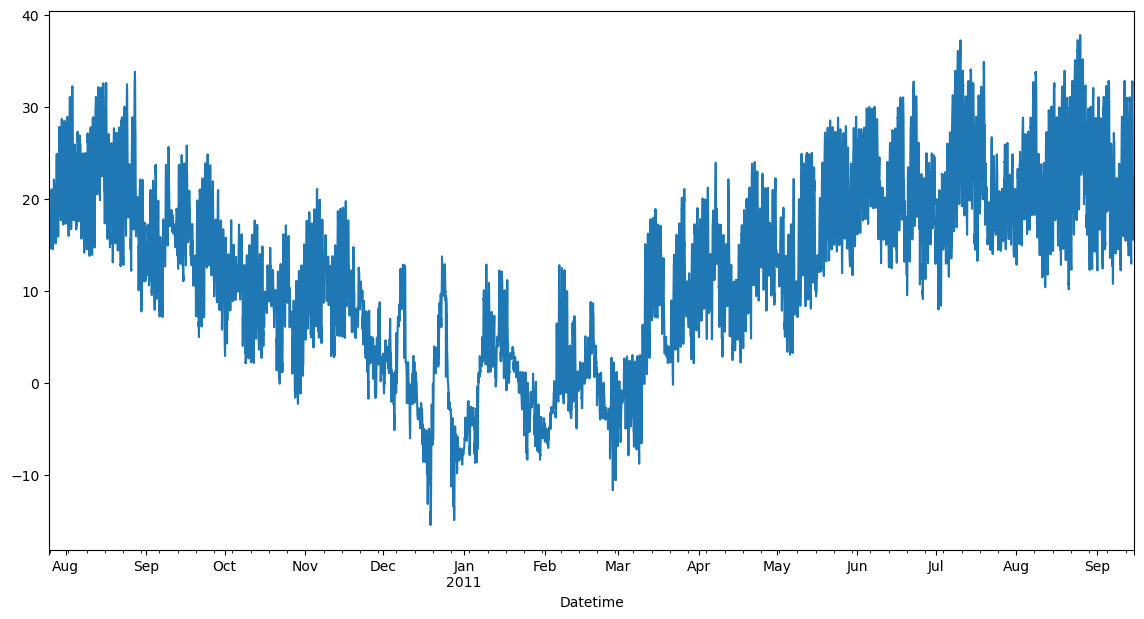

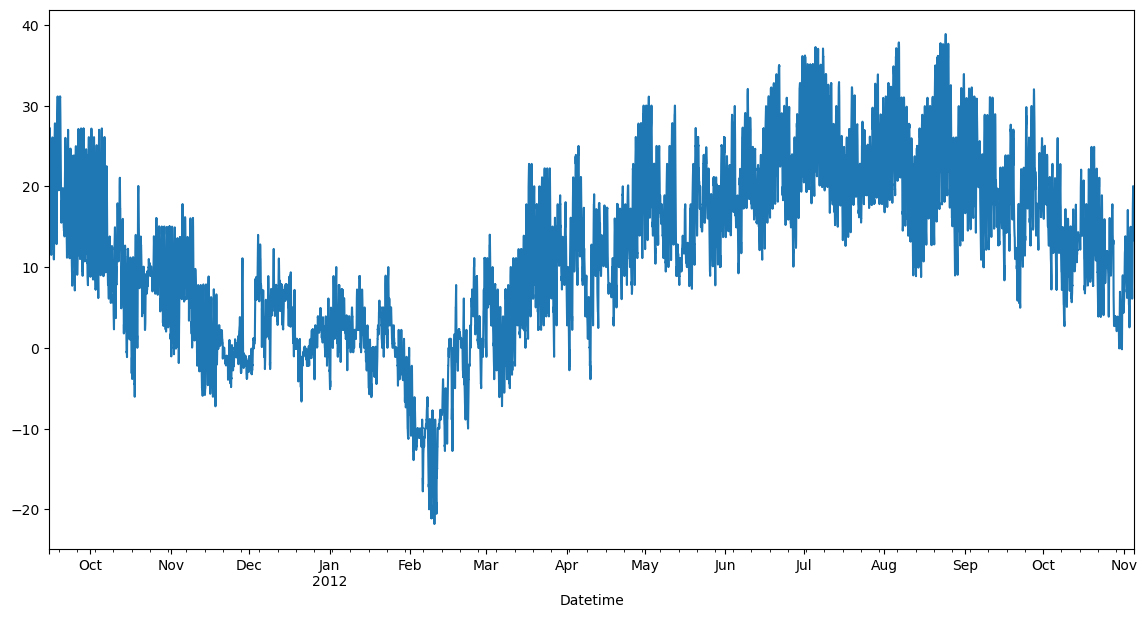

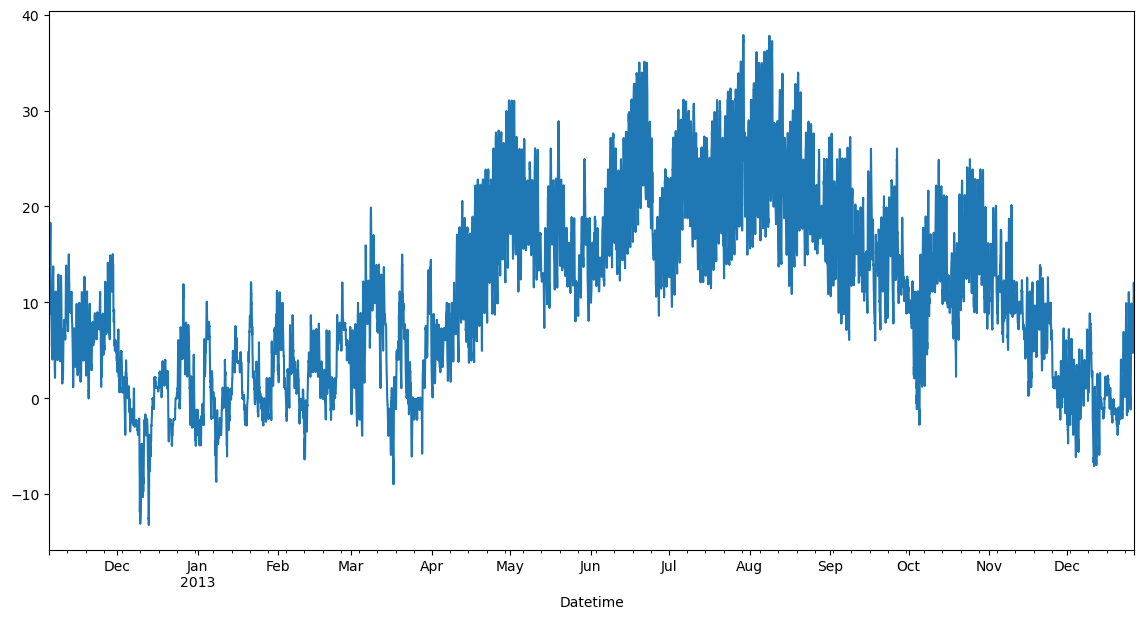

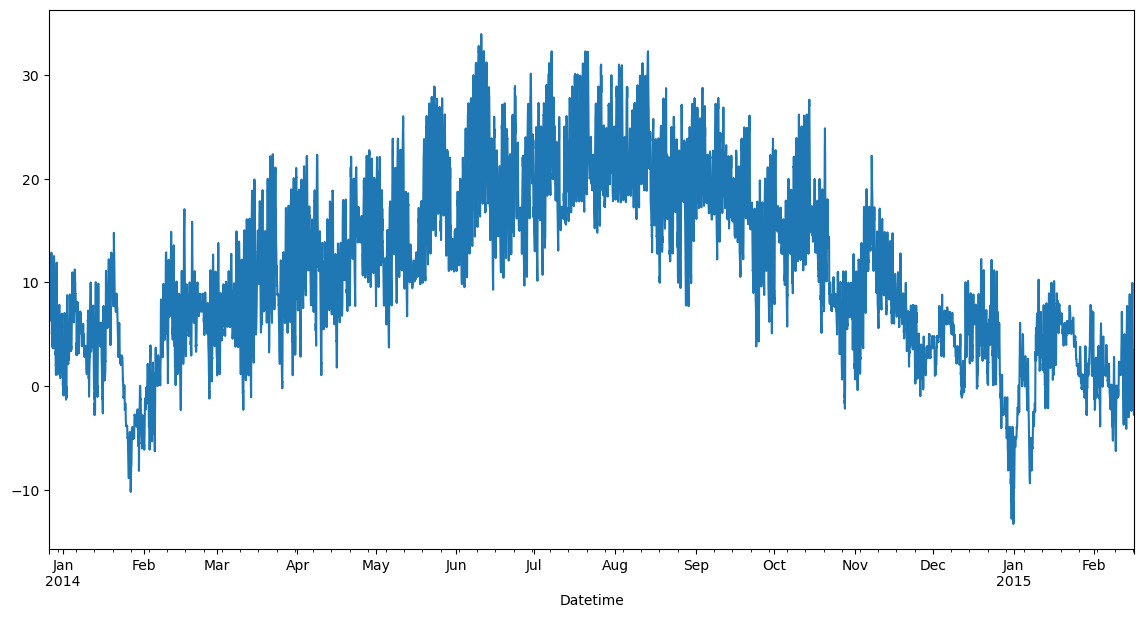

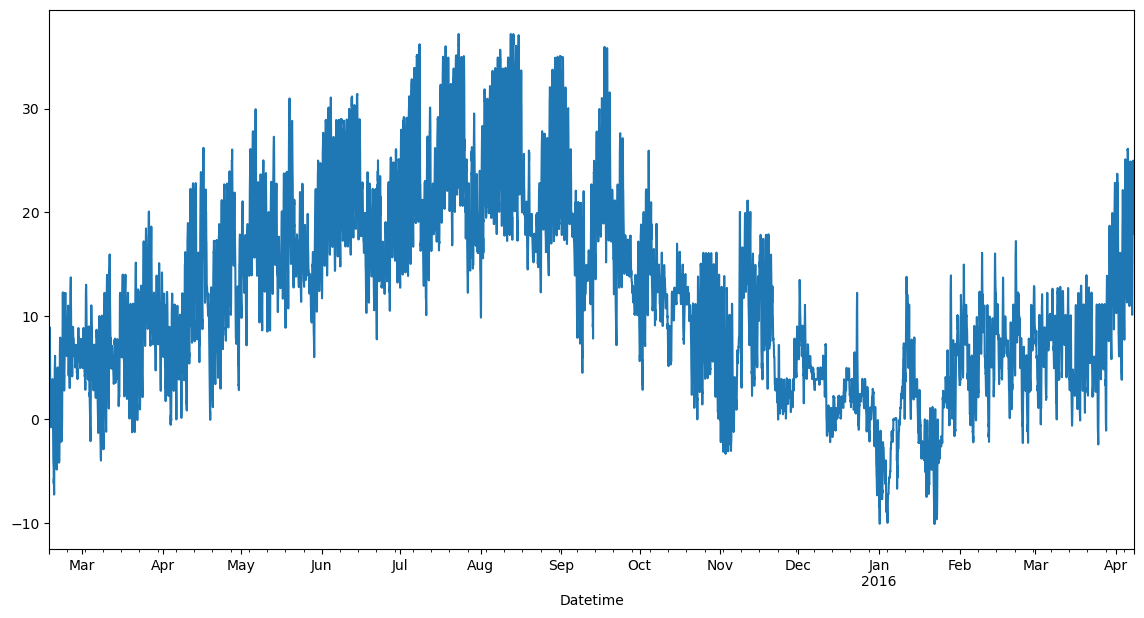

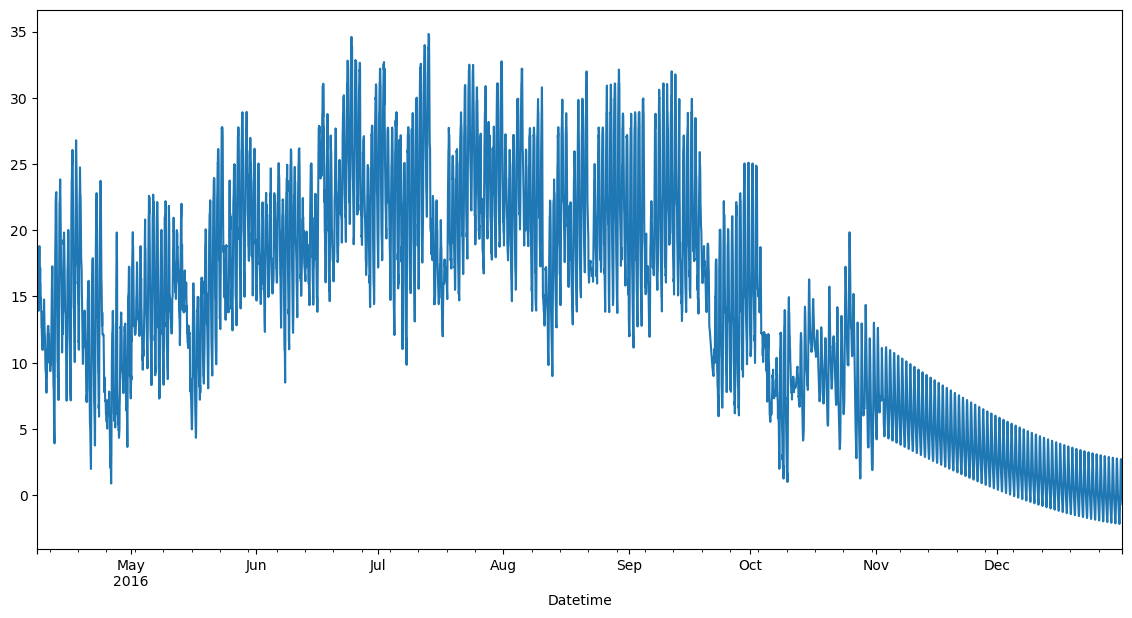

In [202]:
step = 10000
for i in range(0, len(df), step):
    plt.figure(figsize = (14, 7))
    df.iloc[i:i + step]['Temperature (C)'].plot()
    plt.show()

## Dropping unnecessary columns

In [10]:
df.drop(columns = ['Summary', 'Apparent Temperature (C)', 'Loud Cover', 'Daily Summary'], inplace = True)
df

Precip Type  Temperature (C)  Humidity  \
Datetime                                                           
2005-12-31 23:00:00+00:00        rain         0.577778      0.89   
2006-01-01 00:00:00+00:00        rain         1.161111      0.85   
2006-01-01 01:00:00+00:00        rain         1.666667      0.82   
2006-01-01 02:00:00+00:00        rain         1.711111      0.82   
2006-01-01 03:00:00+00:00        rain         1.183333      0.86   
...                               ...              ...       ...   
2016-12-31 18:00:00+00:00        rain         0.488889      0.86   
2016-12-31 19:00:00+00:00        rain         0.072222      0.88   
2016-12-31 20:00:00+00:00        snow        -0.233333      0.89   
2016-12-31 21:00:00+00:00        snow        -0.472222      0.91   
2016-12-31 22:00:00+00:00        snow        -0.677778      0.92   

                           Wind Speed (km/h)  Wind Bearing (degrees)  \
Datetime                                                               
2005-12-31 23:00:00+00:00            17.1143                   140.0   
2006-01-01 00:00:00+00:00            16.6152                   139.0   
2006-01-01 01:00:00+00:00            20.2538                   140.0   
2006-01-01 02:00:00+00:00            14.4900                   140.0   
2006-01-01 03:00:00+00:00            13.9426                   134.0   
...                                      ...                     ...   
2016-12-31 18:00:00+00:00             9.7566                   167.0   
2016-12-31 19:00:00+00:00             9.4185                   169.0   
2016-12-31 20:00:00+00:00             9.2736                   175.0   
2016-12-31 21:00:00+00:00             9.2414                   182.0   
2016-12-31 22:00:00+00:00             9.2253                   189.0   

                           Visibility (km)  Pressure (millibars)  
Datetime                                                          
2005-12-31 23:00:00+00:00           9.9820               1016.66  
2006-01-01 00:00:00+00:00           9.9015               1016.15  
2006-01-01 01:00:00+00:00           9.9015               1015.87  
2006-01-01 02:00:00+00:00           9.9015               1015.56  
2006-01-01 03:00:00+00:00           9.9015               1014.98  
...                                    ...                   ...  
2016-12-31 18:00:00+00:00           8.0178               1020.03  
2016-12-31 19:00:00+00:00           7.2450               1020.27  
2016-12-31 20:00:00+00:00           9.5795               1020.50  
2016-12-31 21:00:00+00:00           8.4042               1020.65  
2016-12-31 22:00:00+00:00           8.8711               1020.72  

[96432 rows x 7 columns]

## Filling missing values

In [11]:
print('Amount of missing values:')
print(df.isna().sum(axis = 0))

Amount of missing values:
Precip Type               520
Temperature (C)             3
Humidity                    3
Wind Speed (km/h)           3
Wind Bearing (degrees)      3
Visibility (km)             3
Pressure (millibars)        3
dtype: int64


In [12]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

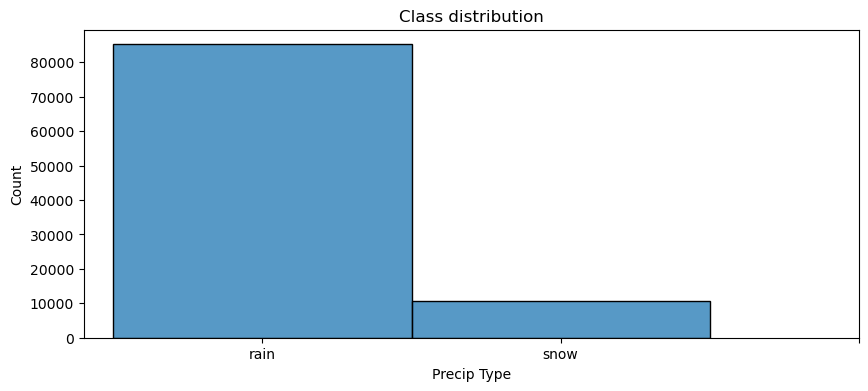

In [13]:
def show_class_distribution(y, encoder = None):
    ticks = [i for i in range(0, len(y.unique()))]
    plt.figure(figsize = (10, 4))
    plt.title('Class distribution')
    if encoder != None:
        sb.histplot(encoder.inverse_transform(y), discrete = True)
    else:
        sb.histplot(y, discrete = True)
    plt.xticks(ticks)
    plt.show()
    
show_class_distribution(df['Precip Type'])

In [14]:
df.fillna({'Precip Type': 'rain'}, inplace = True)
df.fillna({'Temperature (C)': df['Temperature (C)'].mean()}, inplace = True)
df.fillna({'Humidity': df['Humidity'].mean()}, inplace = True)
df.fillna({'Wind Speed (km/h)': df['Wind Speed (km/h)'].mean()}, inplace = True)
df.fillna({'Wind Bearing (degrees)': df['Wind Bearing (degrees)'].mean()}, inplace = True)
df.fillna({'Visibility (km)': df['Visibility (km)'].mean()}, inplace = True)
df.fillna({'Pressure (millibars)': df['Pressure (millibars)'].mean()}, inplace = True)
print('Amount of missing values:')
print(df.isna().sum(axis = 0))

Amount of missing values:
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64


## Precipitation type encoding

In [15]:
df = pd.get_dummies(df, columns = ['Precip Type'])
df.replace({False: 0, True: 1}, inplace = True)
df

Temperature (C)  Humidity  Wind Speed (km/h)  \
Datetime                                                                  
2005-12-31 23:00:00+00:00         0.577778      0.89            17.1143   
2006-01-01 00:00:00+00:00         1.161111      0.85            16.6152   
2006-01-01 01:00:00+00:00         1.666667      0.82            20.2538   
2006-01-01 02:00:00+00:00         1.711111      0.82            14.4900   
2006-01-01 03:00:00+00:00         1.183333      0.86            13.9426   
...                                    ...       ...                ...   
2016-12-31 18:00:00+00:00         0.488889      0.86             9.7566   
2016-12-31 19:00:00+00:00         0.072222      0.88             9.4185   
2016-12-31 20:00:00+00:00        -0.233333      0.89             9.2736   
2016-12-31 21:00:00+00:00        -0.472222      0.91             9.2414   
2016-12-31 22:00:00+00:00        -0.677778      0.92             9.2253   

                           Wind Bearing (degrees)  Visibility (km)  \
Datetime                                                             
2005-12-31 23:00:00+00:00                   140.0           9.9820   
2006-01-01 00:00:00+00:00                   139.0           9.9015   
2006-01-01 01:00:00+00:00                   140.0           9.9015   
2006-01-01 02:00:00+00:00                   140.0           9.9015   
2006-01-01 03:00:00+00:00                   134.0           9.9015   
...                                           ...              ...   
2016-12-31 18:00:00+00:00                   167.0           8.0178   
2016-12-31 19:00:00+00:00                   169.0           7.2450   
2016-12-31 20:00:00+00:00                   175.0           9.5795   
2016-12-31 21:00:00+00:00                   182.0           8.4042   
2016-12-31 22:00:00+00:00                   189.0           8.8711   

                           Pressure (millibars)  Precip Type_rain  \
Datetime                                                            
2005-12-31 23:00:00+00:00               1016.66                 1   
2006-01-01 00:00:00+00:00               1016.15                 1   
2006-01-01 01:00:00+00:00               1015.87                 1   
2006-01-01 02:00:00+00:00               1015.56                 1   
2006-01-01 03:00:00+00:00               1014.98                 1   
...                                         ...               ...   
2016-12-31 18:00:00+00:00               1020.03                 1   
2016-12-31 19:00:00+00:00               1020.27                 1   
2016-12-31 20:00:00+00:00               1020.50                 0   
2016-12-31 21:00:00+00:00               1020.65                 0   
2016-12-31 22:00:00+00:00               1020.72                 0   

                           Precip Type_snow  
Datetime                                     
2005-12-31 23:00:00+00:00                 0  
2006-01-01 00:00:00+00:00                 0  
2006-01-01 01:00:00+00:00                 0  
2006-01-01 02:00:00+00:00                 0  
2006-01-01 03:00:00+00:00                 0  
...                                     ...  
2016-12-31 18:00:00+00:00                 0  
2016-12-31 19:00:00+00:00                 0  
2016-12-31 20:00:00+00:00                 1  
2016-12-31 21:00:00+00:00                 1  
2016-12-31 22:00:00+00:00                 1  

[96432 rows x 8 columns]

## Preprocessed dataset lookup

In [209]:
dataset_lookup(df)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2005-12-31 23:00:00+00:00 to 2016-12-31 22:00:00+00:00
Freq: H
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (C)         96432 non-null  float64
 1   Humidity                96432 non-null  float64
 2   Wind Speed (km/h)       96432 non-null  float64
 3   Wind Bearing (degrees)  96432 non-null  float64
 4   Visibility (km)         96432 non-null  float64
 5   Pressure (millibars)    96432 non-null  float64
 6   Precip Type_rain        96432 non-null  uint8  
 7   Precip Type_snow        96432 non-null  uint8  
dtypes: float64(6), uint8(2)
memory usage: 5.3 MB
None

Dataset description:
       Temperature (C)      Humidity  Wind Speed (km/h)  \
count     96432.000000  96432.000000       96432.000000   
mean         11.929692      0.734902          10.812460   
std           9.550343      0.195463   

# Feature engineering

## Adding time features

In [16]:
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['week_of_year'] = pd.Index(df.index.isocalendar().week)
df['week_of_year'] = df['week_of_year'].astype(int)
df['day'] = df.index.day
df['day_of_year'] = df.index.dayofyear
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour
df

Temperature (C)  Humidity  Wind Speed (km/h)  \
Datetime                                                                  
2005-12-31 23:00:00+00:00         0.577778      0.89            17.1143   
2006-01-01 00:00:00+00:00         1.161111      0.85            16.6152   
2006-01-01 01:00:00+00:00         1.666667      0.82            20.2538   
2006-01-01 02:00:00+00:00         1.711111      0.82            14.4900   
2006-01-01 03:00:00+00:00         1.183333      0.86            13.9426   
...                                    ...       ...                ...   
2016-12-31 18:00:00+00:00         0.488889      0.86             9.7566   
2016-12-31 19:00:00+00:00         0.072222      0.88             9.4185   
2016-12-31 20:00:00+00:00        -0.233333      0.89             9.2736   
2016-12-31 21:00:00+00:00        -0.472222      0.91             9.2414   
2016-12-31 22:00:00+00:00        -0.677778      0.92             9.2253   

                           Wind Bearing (degrees)  Visibility (km)  \
Datetime                                                             
2005-12-31 23:00:00+00:00                   140.0           9.9820   
2006-01-01 00:00:00+00:00                   139.0           9.9015   
2006-01-01 01:00:00+00:00                   140.0           9.9015   
2006-01-01 02:00:00+00:00                   140.0           9.9015   
2006-01-01 03:00:00+00:00                   134.0           9.9015   
...                                           ...              ...   
2016-12-31 18:00:00+00:00                   167.0           8.0178   
2016-12-31 19:00:00+00:00                   169.0           7.2450   
2016-12-31 20:00:00+00:00                   175.0           9.5795   
2016-12-31 21:00:00+00:00                   182.0           8.4042   
2016-12-31 22:00:00+00:00                   189.0           8.8711   

                           Pressure (millibars)  Precip Type_rain  \
Datetime                                                            
2005-12-31 23:00:00+00:00               1016.66                 1   
2006-01-01 00:00:00+00:00               1016.15                 1   
2006-01-01 01:00:00+00:00               1015.87                 1   
2006-01-01 02:00:00+00:00               1015.56                 1   
2006-01-01 03:00:00+00:00               1014.98                 1   
...                                         ...               ...   
2016-12-31 18:00:00+00:00               1020.03                 1   
2016-12-31 19:00:00+00:00               1020.27                 1   
2016-12-31 20:00:00+00:00               1020.50                 0   
2016-12-31 21:00:00+00:00               1020.65                 0   
2016-12-31 22:00:00+00:00               1020.72                 0   

                           Precip Type_snow  year  quarter  month  \
Datetime                                                            
2005-12-31 23:00:00+00:00                 0  2005        4     12   
2006-01-01 00:00:00+00:00                 0  2006        1      1   
2006-01-01 01:00:00+00:00                 0  2006        1      1   
2006-01-01 02:00:00+00:00                 0  2006        1      1   
2006-01-01 03:00:00+00:00                 0  2006        1      1   
...                                     ...   ...      ...    ...   
2016-12-31 18:00:00+00:00                 0  2016        4     12   
2016-12-31 19:00:00+00:00                 0  2016        4     12   
2016-12-31 20:00:00+00:00                 1  2016        4     12   
2016-12-31 21:00:00+00:00                 1  2016        4     12   
2016-12-31 22:00:00+00:00                 1  2016        4     12   

                           week_of_year  day  day_of_year  day_of_week  hour  
Datetime                                                                      
2005-12-31 23:00:00+00:00            52   31          365            5    23  
2006-01-01 00:00:00+00:00            52    1            1            6     0  
2006-01-01 01:00:00+00:00   

## Showcase of time features

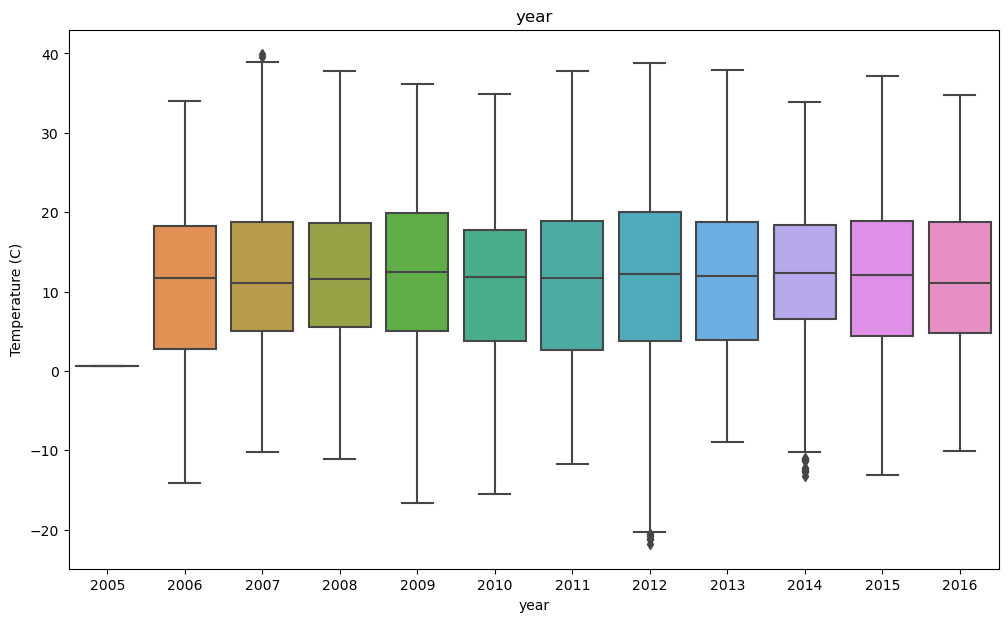

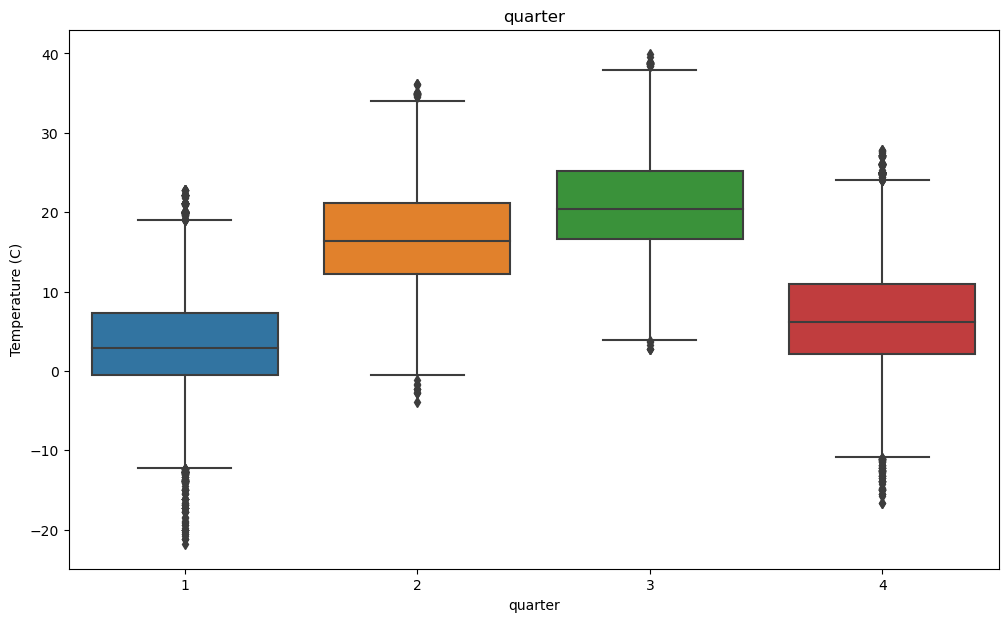

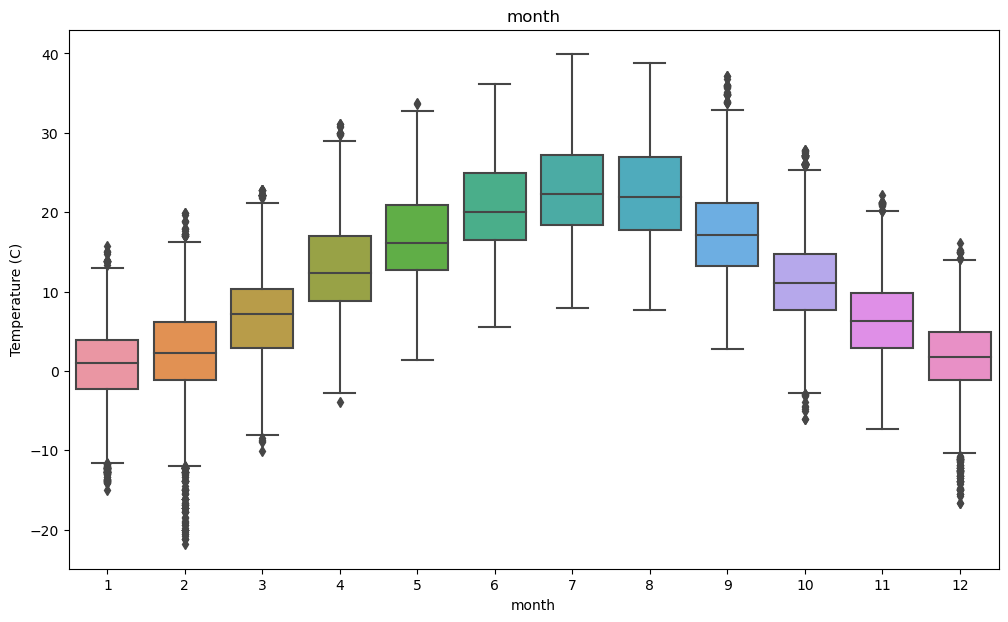

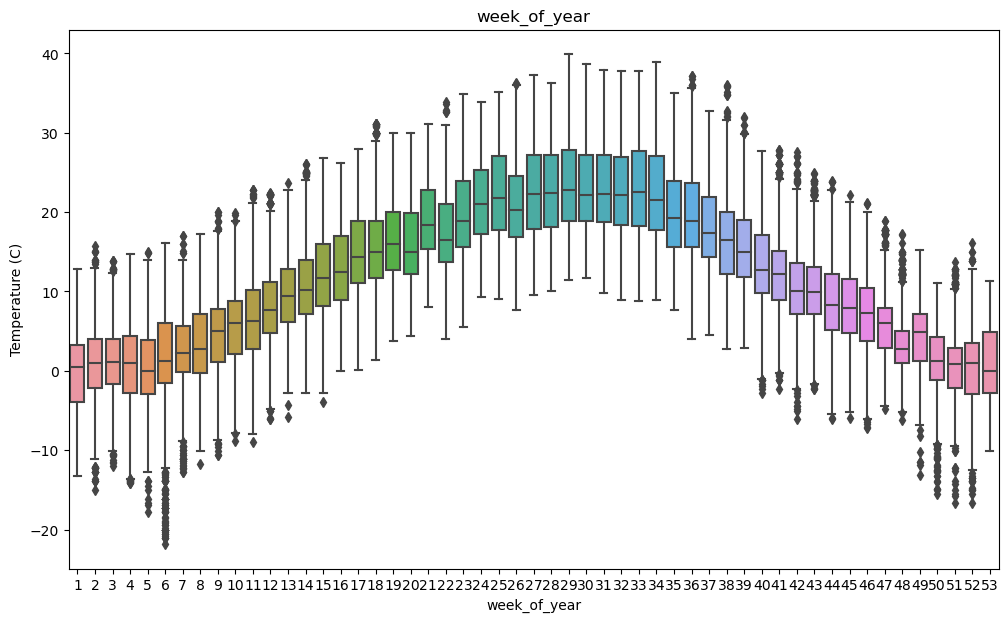

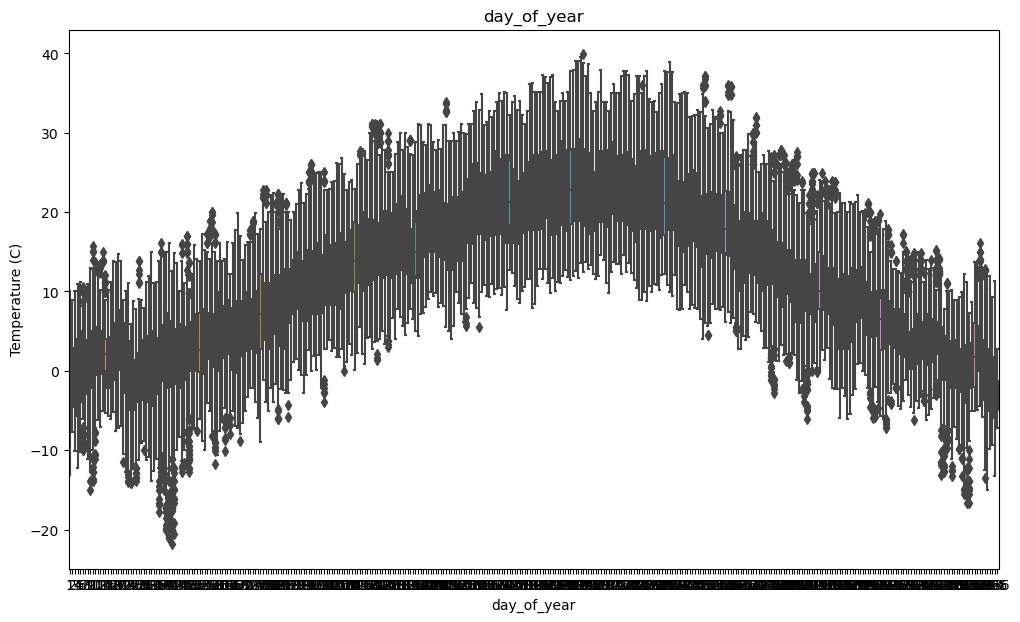

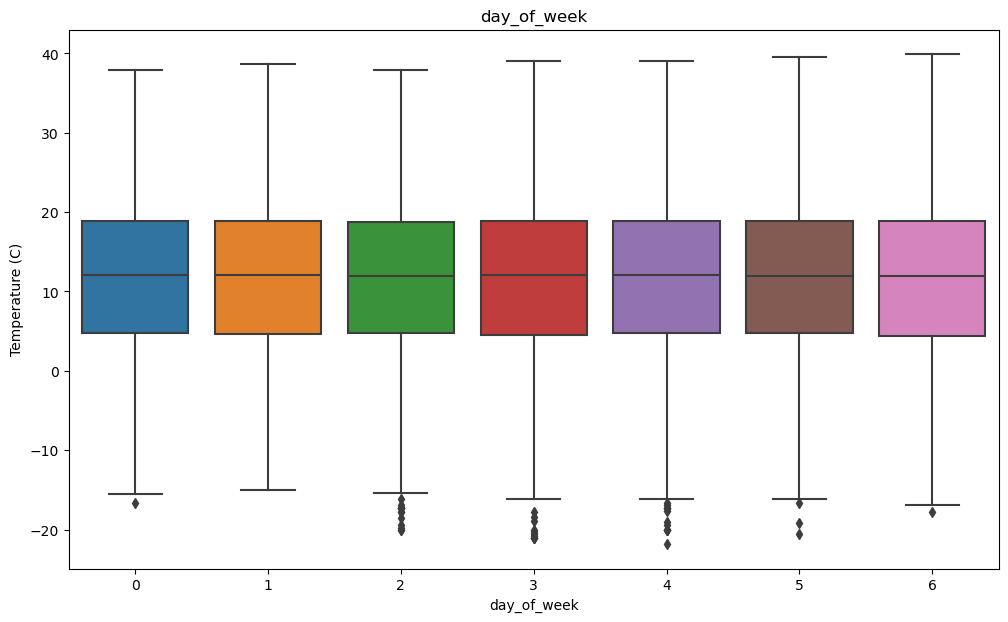

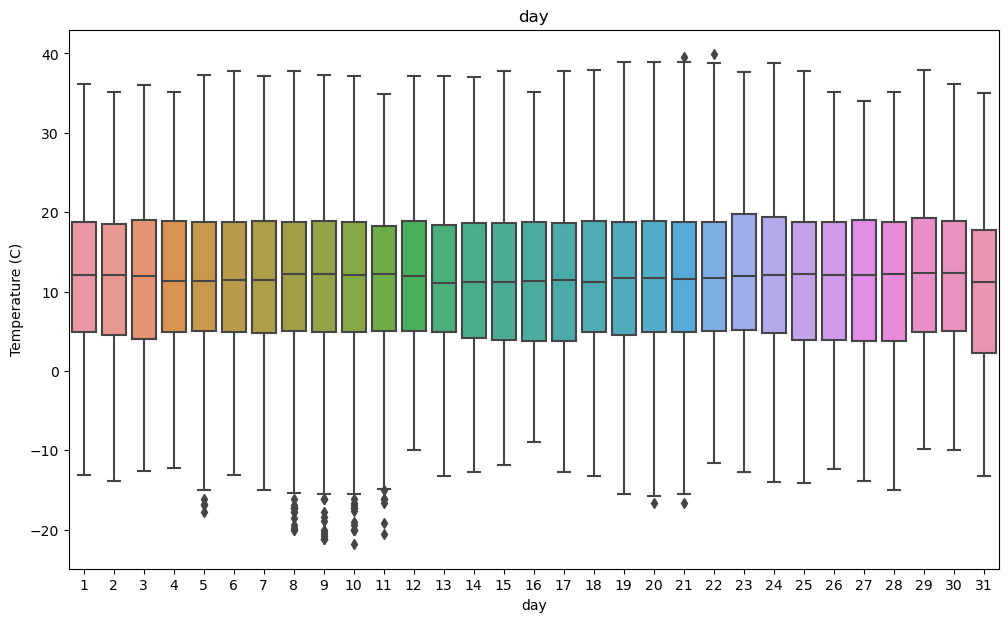

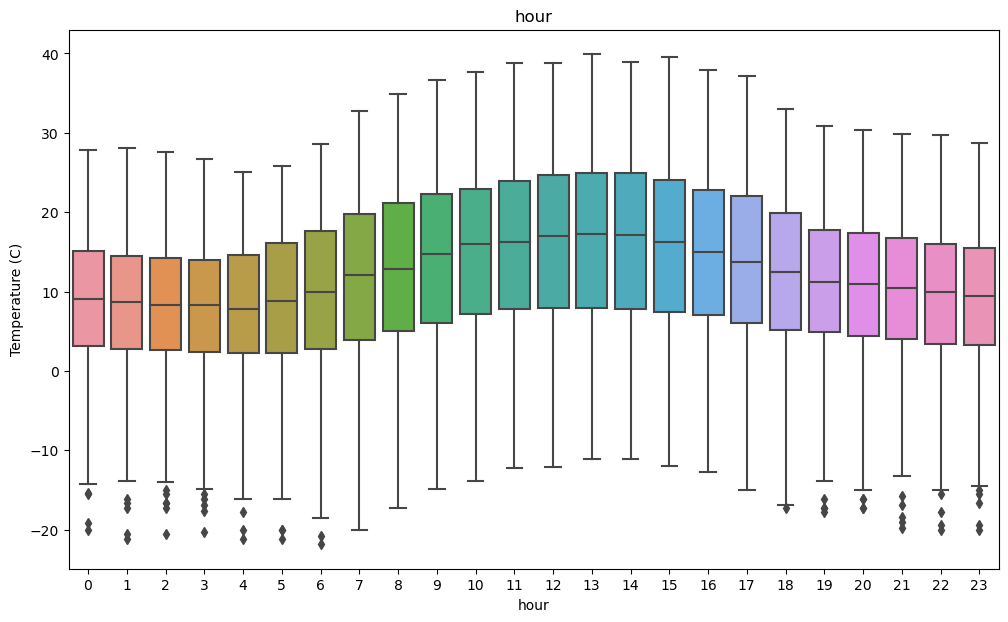

In [211]:
time_features = ['year', 'quarter', 'month', 'week_of_year', 'day_of_year', 'day_of_week', 'day', 'hour']
for feature in time_features:
    plt.figure(figsize = (12, 7))
    plt.title(feature)
    sb.boxplot(x = feature, y = 'Temperature (C)', data = df)
    plt.show()

# Cross-validation for time series using neural networks

In [217]:
#df.to_csv('weather_history_preprocessed.csv')
df = pd.read_csv(f'{drive_path}/weather_history_preprocessed.csv', index_col = 'Datetime')
df

Temperature (C)  Humidity  Wind Speed (km/h)  \
Datetime                                                                  
2005-12-31 23:00:00+00:00         0.577778      0.89            17.1143   
2006-01-01 00:00:00+00:00         1.161111      0.85            16.6152   
2006-01-01 01:00:00+00:00         1.666667      0.82            20.2538   
2006-01-01 02:00:00+00:00         1.711111      0.82            14.4900   
2006-01-01 03:00:00+00:00         1.183333      0.86            13.9426   
...                                    ...       ...                ...   
2016-12-31 18:00:00+00:00         0.488889      0.86             9.7566   
2016-12-31 19:00:00+00:00         0.072222      0.88             9.4185   
2016-12-31 20:00:00+00:00        -0.233333      0.89             9.2736   
2016-12-31 21:00:00+00:00        -0.472222      0.91             9.2414   
2016-12-31 22:00:00+00:00        -0.677778      0.92             9.2253   

                           Wind Bearing (degrees)  Visibility (km)  \
Datetime                                                             
2005-12-31 23:00:00+00:00                   140.0           9.9820   
2006-01-01 00:00:00+00:00                   139.0           9.9015   
2006-01-01 01:00:00+00:00                   140.0           9.9015   
2006-01-01 02:00:00+00:00                   140.0           9.9015   
2006-01-01 03:00:00+00:00                   134.0           9.9015   
...                                           ...              ...   
2016-12-31 18:00:00+00:00                   167.0           8.0178   
2016-12-31 19:00:00+00:00                   169.0           7.2450   
2016-12-31 20:00:00+00:00                   175.0           9.5795   
2016-12-31 21:00:00+00:00                   182.0           8.4042   
2016-12-31 22:00:00+00:00                   189.0           8.8711   

                           Pressure (millibars)  Precip Type_rain  \
Datetime                                                            
2005-12-31 23:00:00+00:00               1016.66                 1   
2006-01-01 00:00:00+00:00               1016.15                 1   
2006-01-01 01:00:00+00:00               1015.87                 1   
2006-01-01 02:00:00+00:00               1015.56                 1   
2006-01-01 03:00:00+00:00               1014.98                 1   
...                                         ...               ...   
2016-12-31 18:00:00+00:00               1020.03                 1   
2016-12-31 19:00:00+00:00               1020.27                 1   
2016-12-31 20:00:00+00:00               1020.50                 0   
2016-12-31 21:00:00+00:00               1020.65                 0   
2016-12-31 22:00:00+00:00               1020.72                 0   

                           Precip Type_snow  year  quarter  month  \
Datetime                                                            
2005-12-31 23:00:00+00:00                 0  2005        4     12   
2006-01-01 00:00:00+00:00                 0  2006        1      1   
2006-01-01 01:00:00+00:00                 0  2006        1      1   
2006-01-01 02:00:00+00:00                 0  2006        1      1   
2006-01-01 03:00:00+00:00                 0  2006        1      1   
...                                     ...   ...      ...    ...   
2016-12-31 18:00:00+00:00                 0  2016        4     12   
2016-12-31 19:00:00+00:00                 0  2016        4     12   
2016-12-31 20:00:00+00:00                 1  2016        4     12   
2016-12-31 21:00:00+00:00                 1  2016        4     12   
2016-12-31 22:00:00+00:00                 1  2016        4     12   

                           week_of_year  day  day_of_year  day_of_week  hour  
Datetime                                                                      
2005-12-31 23:00:00+00:00            52   31          365            5    23  
2006-01-01 00:00:00+00:00            52    1            1            6     0  
2006-01-01 01:00:00+00:00   

## Functions & imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, GRU, LSTM

# List of devices
tf.config.list_physical_devices()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_test, y_pred))

def mape(y_true, y_pred):
    return (1.0 / len(y_true)) * np.sum(np.abs((y_true - y_pred) / y_true))

def smape(y_true, y_pred):
    return (1.0 / len(y_true)) * np.sum(np.abs(y_pred - y_true) / ((y_true + y_pred) / 2.0))

def scale_train_and_test(train, test, columns_to_scale):
    if train.shape[-1] != test.shape[-1]:
        raise Exception('Train and test dataframes are incompatible')
    scaler = StandardScaler()
    train_scaled_columns = scaler.fit_transform(train[columns_to_scale])
    test_scaled_columns = scaler.transform(test[columns_to_scale])
    columns = list(train.columns)
    for column in columns_to_scale:
        columns.remove(column)
    train_scaled = pd.DataFrame(
        train.drop(columns = columns_to_scale),
        index = train.index,
        columns = columns)
    for i, column in enumerate(columns_to_scale):
        train_scaled[column] = train_scaled_columns.T[i]
    test_scaled = pd.DataFrame(
        test.drop(columns = columns_to_scale),
        index = test.index,
        columns = columns)
    for i, column in enumerate(columns_to_scale):
        test_scaled[column] = test_scaled_columns.T[i]
    return train_scaled, test_scaled, scaler

def show_regression_chart(y, prediction, sort = True):
    t = pd.DataFrame({'prediction': prediction, 'y': y})
    if sort:
        t.sort_values(by = ['y'], inplace = True)
    plt.figure(figsize = (10, 6))
    plt.plot(t['y'].tolist(), label = 'expected')
    plt.plot(t['prediction'].tolist(), label = 'prediction')
    plt.ylabel('output')
    plt.legend()
    plt.xticks(rotation = 45)
    plt.show()
    
def show_training_history(history, metrics, metric_names, figure_size = (7, 6), last_epoch = None):
    if len(metrics) == 1 and len(metric_names) == 1:
        plt.figure(figsize = figure_size)
        fig, ax = plt.subplots()
        metric = metrics[0]
        metric_name = metric_names[0]
        ax.plot(history[metric], color = 'b', label = f'Training {metric_name}')
        if f'val_{metric}' in history:
            ax.plot(history[f'val_{metric}'], color = 'r', label = f'Validation {metric_name}')
        if last_epoch is not None:
            ax.axvline(x = last_epoch, color = 'g', label = 'Start of fine tuning')
        legend = ax.legend(loc = 'best', shadow = True)
        plt.show()
    elif len(metrics) > 1 and len(metrics) == len(metric_names):
        plt.figure(figsize = figure_size)
        fig, ax = plt.subplots(len(metrics), 1)
        for i in range(len(metrics)):
            metric = metrics[i]
            metric_name = metric_names[i]
            ax[i].plot(history[metric], color = 'b', label = f'Training {metric_name}')
            if f'val_{metric}' in history:
                ax[i].plot(history[f'val_{metric}'], color = 'r', label = f'Validation {metric_name}', axes = ax[i])
            if last_epoch is not None:
                ax[i].axvline(x = last_epoch, color = 'g', label = 'Start of fine tuning')
            legend = ax[i].legend(loc = 'best', shadow = True)
        plt.show()
    else:
        raise Exception('Invalid metrics/metric names amount')
        
def create_dataset(df, target_column_name, look_back = 1):
    target_column_position = df.columns.get_loc(target_column_name)
    dataX, dataY = [], []
    for i in range(len(df) - look_back - 1):
        x_slice = df.iloc[i:(i + look_back)]
        x_slice = x_slice.drop(x_slice.columns[target_column_position], axis = 1)
        dataX.append(x_slice)
        dataY.append(df.iloc[i + look_back, target_column_position])
    dataX = np.array(dataX)
    dataY = np.array(dataY)
    return np.reshape(dataX, (dataX.shape[0], dataX.shape[1], df.shape[-1] - 1)), dataY

## Taking a smaller part of the dataset

In [17]:
df_small = df[-(24 * 365 * 5):].copy() # last 5 years of historical data
df_small

Temperature (C)  Humidity  Wind Speed (km/h)  \
Datetime                                                                  
2012-01-02 23:00:00+00:00         2.777778      0.92            11.2700   
2012-01-03 00:00:00+00:00         2.622222      0.89            10.2718   
2012-01-03 01:00:00+00:00         3.333333      0.85            11.2700   
2012-01-03 02:00:00+00:00         3.333333      0.85            11.2700   
2012-01-03 03:00:00+00:00         3.505556      0.82             5.8443   
...                                    ...       ...                ...   
2016-12-31 18:00:00+00:00         0.488889      0.86             9.7566   
2016-12-31 19:00:00+00:00         0.072222      0.88             9.4185   
2016-12-31 20:00:00+00:00        -0.233333      0.89             9.2736   
2016-12-31 21:00:00+00:00        -0.472222      0.91             9.2414   
2016-12-31 22:00:00+00:00        -0.677778      0.92             9.2253   

                           Wind Bearing (degrees)  Visibility (km)  \
Datetime                                                             
2012-01-02 23:00:00+00:00                   180.0          12.0750   
2012-01-03 00:00:00+00:00                   170.0          11.7530   
2012-01-03 01:00:00+00:00                   160.0          12.0750   
2012-01-03 02:00:00+00:00                   170.0          12.0750   
2012-01-03 03:00:00+00:00                   174.0          11.7530   
...                                           ...              ...   
2016-12-31 18:00:00+00:00                   167.0           8.0178   
2016-12-31 19:00:00+00:00                   169.0           7.2450   
2016-12-31 20:00:00+00:00                   175.0           9.5795   
2016-12-31 21:00:00+00:00                   182.0           8.4042   
2016-12-31 22:00:00+00:00                   189.0           8.8711   

                           Pressure (millibars)  Precip Type_rain  \
Datetime                                                            
2012-01-02 23:00:00+00:00               1019.10                 1   
2012-01-03 00:00:00+00:00               1018.99                 1   
2012-01-03 01:00:00+00:00               1019.20                 1   
2012-01-03 02:00:00+00:00               1019.70                 1   
2012-01-03 03:00:00+00:00               1020.39                 1   
...                                         ...               ...   
2016-12-31 18:00:00+00:00               1020.03                 1   
2016-12-31 19:00:00+00:00               1020.27                 1   
2016-12-31 20:00:00+00:00               1020.50                 0   
2016-12-31 21:00:00+00:00               1020.65                 0   
2016-12-31 22:00:00+00:00               1020.72                 0   

                           Precip Type_snow  year  quarter  month  \
Datetime                                                            
2012-01-02 23:00:00+00:00                 0  2012        1      1   
2012-01-03 00:00:00+00:00                 0  2012        1      1   
2012-01-03 01:00:00+00:00                 0  2012        1      1   
2012-01-03 02:00:00+00:00                 0  2012        1      1   
2012-01-03 03:00:00+00:00                 0  2012        1      1   
...                                     ...   ...      ...    ...   
2016-12-31 18:00:00+00:00                 0  2016        4     12   
2016-12-31 19:00:00+00:00                 0  2016        4     12   
2016-12-31 20:00:00+00:00                 1  2016        4     12   
2016-12-31 21:00:00+00:00                 1  2016        4     12   
2016-12-31 22:00:00+00:00                 1  2016        4     12   

                           week_of_year  day  day_of_year  day_of_week  hour  
Datetime                                                                      
2012-01-02 23:00:00+00:00             1    2            2            0    23  
2012-01-03 00:00:00+00:00             1    3            3            1     0  
2012-01-03 01:00:00+00:00   

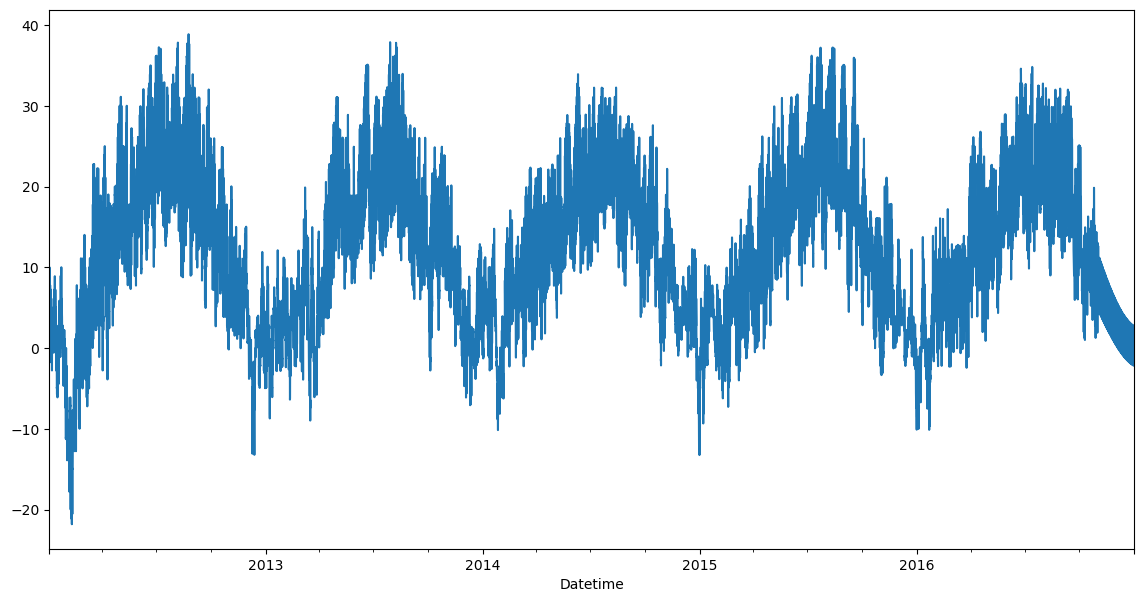

In [18]:
plt.figure(figsize = (14, 7))
df_small['Temperature (C)'].plot()
plt.show()

## Train & test split

In [28]:
rows_count = len(df_small)
proportion = 0.80
train_count = int(rows_count * proportion)
test_count = rows_count - train_count
df_train = df_small[:train_count].copy()
df_test = df_small[train_count:train_count + test_count].copy()
print(f'Train: {len(df_train)}')
print(f'Test: {len(df_test)}')

Train: 35040
Test: 8760


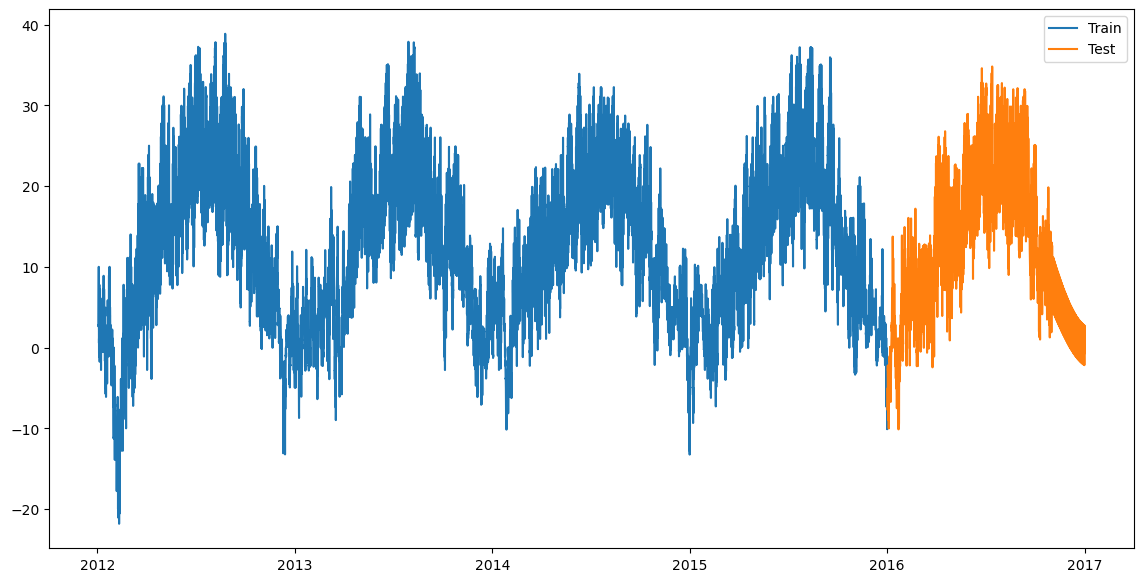

In [26]:
plt.figure(figsize = (14, 7))
plt.plot(df_train['Temperature (C)'])
plt.plot(df_test['Temperature (C)'])
plt.legend(['Train', 'Test'])
plt.show()

## ML models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

models = []
models.append(('Dummy', DummyRegressor()))
models.append(('LR', LinearRegression(fit_intercept = False)))
models.append(('KNN', KNeighborsRegressor(n_neighbors = 20, n_jobs = -1)))
models.append(('CART', DecisionTreeRegressor(random_state = 42)))
models.append(('RF', RandomForestRegressor(n_jobs = -1, random_state = 42)))
models.append(('XT', ExtraTreesRegressor(n_jobs = -1, random_state = 42)))
models.append(('BAG', BaggingRegressor(n_jobs = -1, random_state = 42)))
models.append(('ADA', AdaBoostRegressor(random_state = 42)))
models.append(('HGBoost', HistGradientBoostingRegressor(random_state = 42)))
models.append(('XGBoost', XGBRegressor(tree_method = 'gpu_hist', verbosity = 0, random_state = 42)))
models.append(('CatBoost', CatBoostRegressor(
    random_seed = 42,
    loss_function = 'RMSE',
    eval_metric = 'MAE',
    od_type = 'Iter',
    od_wait = 20,
    task_type = 'GPU',
    logging_level = 'Silent')))

results = {
    'r2' : [],
    'mse' : [],
    'rmse' : [],
    'mae' : [],
    'mape' : [],
    'smape' : []
}

names = []
for name, model in models:
    names.append(name)
    print('----------------')
    print(f'{name} model...')
    model_results = {
        'r2' : [],
        'mse' : [],
        'rmse' : [],
        'mae' : [],
        'mape' : [],
        'smape' : []
    }
    fold_num = 1
    num_of_splits = 5
    timeFold = TimeSeriesSplit(n_splits = num_of_splits)
    for train_range, test_range in timeFold.split(df_train):
        print(f'Fold #{fold_num}...')
        train = df_train.iloc[train_range]
        test = df_train.iloc[test_range]
        columns_to_scale = [
            'Temperature (C)',
            'Humidity',
            'Wind Speed (km/h)',
            'Wind Bearing (degrees)',
            'Visibility (km)',
            'Pressure (millibars)'
        ]
        target_column = 'Temperature (C)'
        train_scaled, test_scaled, _ = scale_train_and_test(train, test, columns_to_scale)
        x_train = train_scaled.drop(columns = target_column)
        y_train = train_scaled[target_column]
        x_test = test_scaled.drop(columns = target_column)
        y_test = test_scaled[target_column]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        model_results['r2'].append(r2(y_test, y_pred))
        model_results['mse'].append(mse(y_test, y_pred))
        model_results['rmse'].append(rmse(y_test, y_pred))
        model_results['mae'].append(mae(y_test, y_pred))
        model_results['mape'].append(mape(y_test, y_pred))
        model_results['smape'].append(smape(y_test, y_pred))
        if fold_num == num_of_splits:
            show_regression_chart(y_test, y_pred, sort = False)
        fold_num += 1
    for model_result_key, model_result_value in model_results.items():
        results[model_result_key].append(model_result_value)
    print('Done!')
    print()
    
for result_key, result_value in results.items():
    plt.title(f'{result_key.upper()} scoring')
    plt.boxplot(result_value, labels = names)
    plt.xticks(rotation = 45)
    plt.show()

## DL models

In [ ]:
# Сразу же отщипнуть от датасета маленький кусочек для наглядных тестов (пару процентов от общего числа строк)
# Попробовать перцептрон со средним большим кол-вом слоев (5-7) и батч-нормализациями между ними
# Попробовать ЛСТМ со средним кол-вом слоев (5-7) и батч-нормализациями между ними (как в рекурентных сетях нормализация правильно делается?)
# Посмотреть, как работают все модели на тестовой выборке 